# Imports


In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import r2_score

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
def get_questions_vars(yearz,file ):
  url = f'https://wwwn.cdc.gov/Nchs/Nhanes/{yearz}/{file}.htm'

  response = requests.get(url)


    # Parse the HTML content
  soup = BeautifulSoup(response.content, 'html.parser')

    # Find the element with the id 'Codebook'
  codebook = soup.find(id='Codebook')

    # Find all div elements under 'Codebook'
  items = codebook.find_all('div')

    # Initialize an empty list to hold the data
  data = []

    # Iterate over 'items' to extract information from each item
  for item in items:
        # Extract the text of each item
        text = item.text.strip()
        # Append the text to the data list
        data.append(text)

    # Convert the data list into a DataFrame
  df = pd.DataFrame(data, columns=['Item'])
  return df

In [ ]:
nhanes_year = ['2013-2014', '2015-2016','2017-2018']
questionnaire_codes_17_18 = ["DEMO_J", "ALQ_J", "BPQ_J", "CDQ_J", "HSQ_J", "DIQ_J", "IMQ_J", "INQ_J", "MCQ_J", "PAQ_J", "DPQ_J", "SMQ_J", "SMQSHS_J"]
questionnaire_codes_15_16 = ["DEMO_I","ALQ_I", "BPQ_I", "CDQ_I", "HSQ_I", "DIQ_I", "IMQ_I", "INQ_I", "MCQ_I", "PAQ_I", "DPQ_I", "SMQ_I", "SMQSHS_I"]
questionnaire_codes_13_14 = ["DEMO_H","ALQ_H", "BPQ_H", "CDQ_H", "HSQ_H", "DIQ_H", "IMQ_H", "INQ_H", "MCQ_H", "PAQ_H", "DPQ_H", "SMQ_H", "SMQSHS_H"]

In [ ]:
# to get variable labels
(get_questions_vars(nhanes_year[0], 'SMQ_H'))

,Item
0,SEQN - Respondent sequence number\n\nVariable ...
1,SMQ020 - Smoked at least 100 cigarettes in lif...
2,SMD030 - Age started smoking cigarettes regula...
3,SMQ040 - Do you now smoke cigarettes\n\nVariab...
4,SMQ050Q - How long since quit smoking cigarett...
5,SMQ050U - Unit of measure (day/week/month/year...
6,SMD055 - Age last smoked cigarettes regularly\...
7,SMD057 - # cigarettes smoked per day when quit...
8,SMQ078 - How soon after waking do you smoke\...
9,SMD641 - # days smoked cigs during past 30 day...


# Data & Processing

In [ ]:
"""

LIST TO DOWNLOAD\

https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire&Cycle=2017-2020

 Alcohol Use
 Blood Pressure & Cholesterol
 Cardiovascular Health
 Current Health Status
 Diabetes
 Immunization
 Income...?
 Medical Conditions
 Mental Health - Depression Screener?
 Physical Activity
 Sleep Disorders
 Smoking - Cigarette Use
 Smoking - Secondhand Smoke Exposure
"""

'\n\nLIST TO DOWNLOAD\nhttps://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire&Cycle=2017-2020\n\n Alcohol Use\n Blood Pressure & Cholesterol\n Cardiovascular Health\n Current Health Status\n Diabetes\n Immunization\n Income...?\n Medical Conditions\n Mental Health - Depression Screener?\n Physical Activity\n Sleep Disorders\n Smoking - Cigarette Use\n Smoking - Secondhand Smoke Exposure\n'

# DATAFRAMES AND CLEANING

In [ ]:
# golvis "ALQ_J", "BPQ_J", "CDQ_J", "HSQ_J"
# peter "DIQ_J", "IMQ_J", "INQ_J", "MCQ_J"
# mark "PAQ_J", "DPQ_J", "SMQ_J", "SMQSHS_J"


questionnaire_codes_17_18 = ["DEMO_J","ALQ_J", "BPQ_J", "CDQ_J", "HSQ_J", "DIQ_J", "IMQ_J", "INQ_J", "MCQ_J", "PAQ_J", "DPQ_J", "SMQ_J", "SMQSHS_J"]

questionnaire_codes_15_16 = ["DEMO_I","ALQ_I", "BPQ_I", "CDQ_I", "HSQ_I", "DIQ_I", "IMQ_I", "INQ_I", "MCQ_I", "PAQ_I", "DPQ_I", "SMQ_I", "SMQSHS_I"]

questionnaire_codes_13_14 = ["DEMO_H","ALQ_H", "BPQ_H", "CDQ_H", "HSQ_H", "DIQ_H", "IMQ_H", "INQ_H", "MCQ_H", "PAQ_H", "DPQ_H", "SMQ_H", "SMQSHS_H"]

def Get_dfs_year(years = str, files = list):
    dfs = []
    for file in files:
      url = f'https://wwwn.cdc.gov/Nchs/Nhanes/{years}/{file}.XPT'
      vars()[file] = pd.read_sas(url, format = 'xport', encoding="utf-8")
      filez = vars()[file].copy()
      dfs.append(filez)
    return *tuple(dfs),

In [ ]:
DEMO_J,ALQ_J,BPQ_J,CDQ_J,HSQ_J,DIQ_J,IMQ_J,INQ_J,MCQ_J,PAQ_J,DPQ_J,SMQ_J,SMQSHS_J = Get_dfs_year('2017-2018',questionnaire_codes_17_18)

In [ ]:
DEMO_I,ALQ_I,BPQ_I,CDQ_I,HSQ_I,DIQ_I,IMQ_I,INQ_I,MCQ_I,PAQ_I,DPQ_I,SMQ_I,SMQSHS_I = Get_dfs_year('2015-2016',questionnaire_codes_15_16)

In [ ]:
DEMO_H,ALQ_H,BPQ_H,CDQ_H,HSQ_H,DIQ_H,IMQ_H,INQ_H,MCQ_H,PAQ_H,DPQ_H,SMQ_H,SMQSHS_H = Get_dfs_year('2013-2014',questionnaire_codes_13_14)

In [ ]:
# only keeping certain demographic variables
# note that race shouldn't have 7 changed
# gender, age, ethnicity, military service, education, country of birth, marital status, number of ppl in the family, ratio of family income to poverty
Demo_vars = ['SEQN','RIAGENDR','RIDAGEYR','RIDRETH3','DMQMILIZ','DMDEDUC2','DMDBORN4','DMDMARTL','DMDFMSIZ','INDFMPIR']
DEMO_H = DEMO_H[Demo_vars]
DEMO_I = DEMO_I[Demo_vars]
DEMO_J = DEMO_J[Demo_vars]

# COMBINE ALL DATA

In [ ]:
# only keep the useful demographics variables
print(DEMO_H.shape)
print(DEMO_I.shape)
print(DEMO_J.shape)

(10175, 10)
(9971, 10)
(9254, 10)


In [ ]:
# 2013-2014
# 12 surveys in total
NHANES_2013_2014 = (
    DEMO_H.merge(ALQ_H,how ='outer',on = 'SEQN')\
    .merge(BPQ_H,how ='outer',on = 'SEQN')\
    .merge(CDQ_H,how ='outer',on = 'SEQN')\
    .merge(HSQ_H,how ='outer',on = 'SEQN')\
    .merge(DIQ_H,how ='outer',on = 'SEQN')\
    .merge(IMQ_H,how ='outer',on = 'SEQN')\
    .merge(INQ_H,how ='outer',on = 'SEQN')\
    .merge(MCQ_H,how ='outer',on = 'SEQN')\
    .merge(PAQ_H,how ='outer',on = 'SEQN')\
    .merge(DPQ_H,how ='outer',on = 'SEQN')\
    .merge(SMQ_H,how ='outer',on = 'SEQN')\
    .merge(SMQSHS_H,how ='outer',on='SEQN')
)

In [ ]:
# 2015-2016
NHANES_2015_2016 = (
    DEMO_I.merge(ALQ_I,how='outer',on='SEQN').merge(BPQ_I,how ='outer',on = 'SEQN').merge(CDQ_I,how ='outer',on = 'SEQN')\
    .merge(HSQ_I,how ='outer',on = 'SEQN').merge(DIQ_I,how ='outer',on = 'SEQN').merge(IMQ_I,how ='outer',on = 'SEQN')\
    .merge(INQ_I,how ='outer',on = 'SEQN').merge(MCQ_I,how ='outer',on = 'SEQN').merge(PAQ_I,how ='outer',on = 'SEQN')\
    .merge(DPQ_I,how ='outer',on = 'SEQN').merge(SMQ_I,how ='outer',on = 'SEQN').merge(SMQSHS_I,how ='outer',on='SEQN')
)

In [ ]:
# 2017-2018
NHANES_2017_2018 = (
    DEMO_J.merge(ALQ_J,how ='outer',on = 'SEQN').merge(BPQ_J,how ='outer',on = 'SEQN').merge(CDQ_J,how ='outer',on = 'SEQN')\
    .merge(HSQ_J,how ='outer',on = 'SEQN').merge(DIQ_J,how ='outer',on = 'SEQN').merge(IMQ_J,how ='outer',on = 'SEQN')\
    .merge(INQ_J,how ='outer',on = 'SEQN').merge(MCQ_J,how ='outer',on = 'SEQN').merge(PAQ_J,how ='outer',on = 'SEQN')\
    .merge(DPQ_J,how ='outer',on = 'SEQN').merge(SMQ_J,how ='outer',on = 'SEQN').merge(SMQSHS_J,how ='outer',on='SEQN')
)

### To keep the same variables from all three years of dataset

In [ ]:
print(NHANES_2013_2014.shape)
print(NHANES_2015_2016.shape)
print(NHANES_2017_2018.shape)

(10175, 373)
(9971, 374)
(9254, 282)


In [ ]:
# Get lists of column names
columns_2013_2014 = NHANES_2013_2014.columns.tolist()
columns_2015_2016 = NHANES_2015_2016.columns.tolist()
columns_2017_2018 = NHANES_2017_2018.columns.tolist()

# Find common columns while maintaining the order of columns in NHANES_2017_2018
common_columns = [col for col in columns_2017_2018 if col in columns_2015_2016 and col in columns_2013_2014]

# Print the number of common columns
print("Number of Common Columns:", len(common_columns))

Number of Common Columns: 222


In [ ]:
# Dropping the unique variables only available to these datasets
common_columns_list = list(common_columns)

NHANES_2013_2014 = NHANES_2013_2014[common_columns_list]
NHANES_2015_2016 = NHANES_2015_2016[common_columns_list]
NHANES_2017_2018 = NHANES_2017_2018[common_columns_list]

In [ ]:
# Check shape again
print(NHANES_2013_2014.shape)
print(NHANES_2015_2016.shape)
print(NHANES_2017_2018.shape)

(10175, 222)
(9971, 222)
(9254, 222)


Final number of variables 222.

### Find Correlation

In [ ]:
# Calculate the correlation matrix
correlation_matrix = NHANES_2013_2014.corr()

# Plot the heatmap
#plt.figure(figsize=(100, 100))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
#plt.title("Feature Correlation Matrix")
#plt.show()

<ipython-input-20-2c89976a362a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = NHANES_2013_2014.corr()


In [ ]:
def get_top_correlations_blog(df, threshold=0.65):
    """
    df: the dataframe to get correlations from
    threshold: the maximum and minimum value to include for correlations. For eg, if this is 0.4, only pairs haveing a correlation coefficient greater than 0.4 or less than -0.4 will be included in the results.
    """
    orig_corr = df.corr()
    c = orig_corr.abs()

    so = c.unstack()

   # print("|    Variable 1    |    Variable 2    | Correlation Coefficient    |")
   # print("|------------------|------------------|----------------------------|")

    i=0
    pairs=set()
    result = pd.DataFrame()
    for index, value in so.sort_values(ascending=False).iteritems():
        # Exclude duplicates and self-correlations
        if value > threshold \
        and index[0] != index[1] \
        and (index[0], index[1]) not in pairs \
        and (index[1], index[0]) not in pairs:

            #print(f'|    {index[0]}    |    {index[1]}    |    {orig_corr.loc[(index[0], index[1])]}    |')
            result.loc[i, ['Variable 1', 'Variable 2', 'Correlation Coefficient']] = [index[0], index[1], orig_corr.loc[(index[0], index[1])]]
            pairs.add((index[0], index[1]))
            i+=1
    return result.reset_index(drop=True).set_index(['Variable 1', 'Variable 2'])

In [ ]:
cor_2013_2014 = get_top_correlations_blog(correlation_matrix)

<ipython-input-21-51a18d597baf>:17: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in so.sort_values(ascending=False).iteritems():


In [ ]:
correlation_matrix.shape

(220, 220)

In [ ]:
cor_2013_2014.head(100)

,,Correlation Coefficient
Variable 1,Variable 2,
DID310D,DID310S,0.997759
DIQ300D,DIQ300S,0.991729
HSAQUEX,SMAQUEX,-0.956611
INDFMPIR,INDFMMPI,0.951885
INDFMMPI,INDFMMPC,0.943919
SMD100NI,SMD100TR,0.931363
INDFMMPC,INDFMPIR,0.917918
DPQ010,DPQ020,0.886092
DPQ100,DPQ020,0.880319


In [ ]:
print(NHANES_2013_2014['DIQ300S'].corr(NHANES_2013_2014['DID310S']))

0.43429054261807454


`DID310D` diastolic blood pressure `DID310S` systolic pressure

`HSAQUEX`	`SMAQUEX` `SMAQUEX2` all irrelavant, will be dropped
`DIQ300D`	`DIQ300S` self reported blood pressure, might dropp one of the two 	<br>

`SMD100CO` carbon monoxide, TR is tar, ni is nicotine

DPQ depression score, may create a new total score to present all questions.

`INDFMMPC` poverty



### More cleaning
Removing refused and unknown

In [ ]:
### convert diabetic

Need to do some cleaning with variable conversion, so first create a dataset containing all, then separate based on year to be training and testing.

In [ ]:
NHANES_2013_2014['year'] = 1314
NHANES_2015_2016['year'] = 1516
NHANES_2017_2018['year'] = 1718

In [ ]:
# create new variable for future separation
df = pd.concat([NHANES_2017_2018, NHANES_2015_2016, NHANES_2013_2014], ignore_index = True)
print(df.shape)
df.head(1)

(29400, 223)


,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMQMILIZ,DMDEDUC2,DMDBORN4,DMDMARTL,DMDFMSIZ,INDFMPIR,ALQ130,ALQ151,BPQ020,BPQ030,BPD035,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,CDQ001,CDQ002,CDQ003,CDQ004,CDQ005,CDQ006,CDQ009A,CDQ009B,CDQ009C,CDQ009D,CDQ009E,CDQ009F,CDQ009G,CDQ009H,CDQ008,CDQ010,HSD010,HSQ500,HSQ510,HSQ520,HSQ571,HSQ580,HSQ590,HSAQUEX,DIQ010,DID040,DIQ160,DIQ170,DIQ172,DIQ175A,DIQ175B,DIQ175C,DIQ175D,DIQ175E,DIQ175F,DIQ175G,DIQ175H,DIQ175I,DIQ175J,DIQ175K,DIQ175L,DIQ175M,DIQ175N,DIQ175O,DIQ175P,DIQ175Q,DIQ175R,DIQ175S,DIQ175T,DIQ175U,DIQ175V,DIQ175W,DIQ175X,DIQ180,DIQ050,DID060,DIQ060U,DIQ070,DIQ230,DIQ240,DID250,DID260,DIQ260U,DIQ275,DIQ280,DIQ291,DIQ300S,DIQ300D,DID310S,DID310D,DID320,DID330,DID341,DID350,DIQ350U,DIQ360,DIQ080,IMQ011,IMQ020,IMQ070,IMQ090,INQ020,INQ012,INQ030,INQ060,INQ080,INQ090,INQ132,INQ140,INQ150,IND235,INDFMMPI,INDFMMPC,MCQ010,MCQ025,MCQ035,MCQ040,MCQ050,AGQ030,MCQ053,MCQ080,MCQ092,MCD093,MCQ149,MCQ151,MCQ160A,MCQ195,MCQ160N,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ160M,MCQ170M,MCQ160G,MCQ160K,MCQ170K,MCQ160O,MCQ160L,MCQ170L,MCQ203,MCQ206,MCQ220,MCQ230A,MCQ230B,MCQ230C,MCQ230D,MCQ300B,MCQ300C,MCQ300A,PAQ605,PAQ610,PAD615,PAQ620,PAQ625,PAD630,PAQ635,PAQ640,PAD645,PAQ650,PAQ655,PAD660,PAQ665,PAQ670,PAD675,PAD680,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,SMQ020,SMD030,SMQ040,SMQ050Q,SMQ050U,SMD057,SMQ078,SMD641,SMD650,SMD093,SMDUPCA,SMD100BR,SMD100FL,SMD100MN,SMD100LN,SMD100TR,SMD100NI,SMD100CO,SMQ621,SMD630,SMQ661,SMQ665A,SMQ665B,SMQ665C,SMQ665D,SMQ670,SMQ848,SMQ852Q,SMQ852U,SMAQUEX2,SMQ856,SMQ858,SMQ860,SMQ862,SMQ866,SMQ868,SMQ870,SMQ872,SMQ874,SMQ876,SMQ878,SMQ880,SMAQUEX,year
0,93703.0,2.0,2.0,6.0,NaN,NaN,1.0,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,12.0,5.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN,1.0,2.0,3.0,1718


In [ ]:
df['DIQ010'] = df['DIQ010'].replace(3, 2)

In [ ]:
df['DPQ020'] = df['DPQ020'].round(2)
df['DPQ020'] = df['DPQ020'].apply(lambda x: 1 if x in [1, 2, 3] else x)

In [ ]:
# some irrelavant columns to be dropped
# also to drop the variables that have high correlations
# data source and cigarette brands which would most likely be irrelavant
df = df.drop(columns = ['HSAQUEX', 'SMDUPCA', 'SMD100BR', 'SMAQUEX2', 'SMAQUEX']) # product code for cigarette

In [ ]:
# Convert empty strings to NaN
df.replace('', np.nan, inplace=True)

### unique values

In [ ]:
# To see the extinct values of each variable
from collections import defaultdict

# Dictionary to hold groups of variables
variable_groups = defaultdict(list)

columns_id = ['SEQN','INDFMMPI', 'DID320','DIQ300S','DIQ300D','MCQ206']
  #id, cigarette brand,  poverty index, cholesterol, age_jaundice

# Iterate through each column in the DataFrame
for column in df.columns:
    if column in columns_id:
      continue
    # Get the unique values as a frozenset (which is hashable and can be used as a dictionary key)
    unique_values = frozenset(df[column].unique())

    # Add the column to the corresponding group in the dictionary
    variable_groups[unique_values].append(column)

# Optional: convert defaultdict to a regular dict for easier readability
variable_groups = dict(variable_groups)

for unique_values, columns in variable_groups.items():
    print("Unique Values:", unique_values)
    print("Columns:", columns)
    print()


Unique Values: frozenset({1.0, 2.0})
Columns: ['RIAGENDR']

Unique Values: frozenset({5.397605346934028e-79, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0})
Columns: ['RIDAGEYR']

Unique Values: frozenset({1.0, 2.0, 3.0, 4.0, 6.0, 7.0})
Columns: ['RIDRETH3']

Unique Values: frozenset({1.0, 2.0, 7.0, 9.0, nan})
Columns: ['DMQMILIZ']

Unique Values: frozenset({nan, 2.0, 1.0, 4.0, 5.0, 3.0, 7.0, 9.0})
Columns: ['DMDEDUC2']

Unique Values: frozenset({1.0, 2.0, 99.0, 77.0})
Columns: ['DMDBORN4']

Unique Values: frozenset({nan, 2.0, 3.0, 1.0, 5.0, 6.0, 4.0, 99.0, 77.0})
Colum

In [ ]:
df.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMQMILIZ,DMDEDUC2,DMDBORN4,DMDMARTL,DMDFMSIZ,INDFMPIR,ALQ130,ALQ151,BPQ020,BPQ030,BPD035,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,CDQ001,CDQ002,CDQ003,CDQ004,CDQ005,CDQ006,CDQ009A,CDQ009B,CDQ009C,CDQ009D,CDQ009E,CDQ009F,CDQ009G,CDQ009H,CDQ008,CDQ010,HSD010,HSQ500,HSQ510,HSQ520,HSQ571,HSQ580,HSQ590,DIQ010,DID040,DIQ160,DIQ170,DIQ172,DIQ175A,DIQ175B,DIQ175C,DIQ175D,DIQ175E,DIQ175F,DIQ175G,DIQ175H,DIQ175I,DIQ175J,DIQ175K,DIQ175L,DIQ175M,DIQ175N,DIQ175O,DIQ175P,DIQ175Q,DIQ175R,DIQ175S,DIQ175T,DIQ175U,DIQ175V,DIQ175W,DIQ175X,DIQ180,DIQ050,DID060,DIQ060U,DIQ070,DIQ230,DIQ240,DID250,DID260,DIQ260U,DIQ275,DIQ280,DIQ291,DIQ300S,DIQ300D,DID310S,DID310D,DID320,DID330,DID341,DID350,DIQ350U,DIQ360,DIQ080,IMQ011,IMQ020,IMQ070,IMQ090,INQ020,INQ012,INQ030,INQ060,INQ080,INQ090,INQ132,INQ140,INQ150,IND235,INDFMMPI,INDFMMPC,MCQ010,MCQ025,MCQ035,MCQ040,MCQ050,AGQ030,MCQ053,MCQ080,MCQ092,MCD093,MCQ149,MCQ151,MCQ160A,MCQ195,MCQ160N,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ160M,MCQ170M,MCQ160G,MCQ160K,MCQ170K,MCQ160O,MCQ160L,MCQ170L,MCQ203,MCQ206,MCQ220,MCQ230A,MCQ230B,MCQ230C,MCQ230D,MCQ300B,MCQ300C,MCQ300A,PAQ605,PAQ610,PAD615,PAQ620,PAQ625,PAD630,PAQ635,PAQ640,PAD645,PAQ650,PAQ655,PAD660,PAQ665,PAQ670,PAD675,PAD680,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,SMQ020,SMD030,SMQ040,SMQ050Q,SMQ050U,SMD057,SMQ078,SMD641,SMD650,SMD093,SMD100FL,SMD100MN,SMD100LN,SMD100TR,SMD100NI,SMD100CO,SMQ621,SMD630,SMQ661,SMQ665A,SMQ665B,SMQ665C,SMQ665D,SMQ670,SMQ848,SMQ852Q,SMQ852U,SMQ856,SMQ858,SMQ860,SMQ862,SMQ866,SMQ868,SMQ870,SMQ872,SMQ874,SMQ876,SMQ878,SMQ880,year
0,93703.0,2.0,2.0,6.0,NaN,NaN,1.0,NaN,5.0,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,12.0,5.00,3.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN,1.0,2.0,1718
1,93704.0,1.0,2.0,3.0,NaN,NaN,1.0,NaN,4.0,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,12.0,5.00,3.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,1.0,2.0,1.0,2.0,1718
2,93705.0,2.0,66.0,4.0,2.0,2.0,1.0,3.0,1.0,0.82,1.0,2.0,1.0,1.0,50.0,1.0,1.0,2.0,1.0,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.49,1.0,1.0,10.0,2.0,NaN,NaN,NaN,2.0,2.0,2.0,NaN,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,NaN,2.0,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN

### to convert the missing and refused

In [ ]:
# These are the ones NOT to convert
columns_not_to_convert = ['RIDRETH3',
                          'ALQ130',
                          'HSQ580',
                          'DID040', 'DIQ050', 'DID250', 'DID260', 'DIQ280', 'DID341', 'DID350',
                          'IMQ090',
                          'IND235',
                          'MCQ025', 'MCQ151', 'MCQ206',
                          'PAQ610', 'PAQ625', 'PAQ655','PAQ680',
                          'SMD030', 'SMQ050Q', 'SMD057', 'SMQ078', 'SMD641','SMD650','SMD100TR','SMQ621','SMD630',
                                    'SMQ665A', 'SMQ665B','SMQ665D','SMQ848','SMQ852Q']

all_columns = df.columns
columns_to_change = [col for col in all_columns if col not in columns_not_to_convert]

# Replace 7 and 9 with np.nan
df[columns_to_change] = df[columns_to_change].replace([7, 9], np.nan)

In [ ]:
# Then the 77 and 99s
columns_77 = ['CDQ009A',
              'HSQ580',
              'DIQ175A', 'DIQ291',
              'IND235',
              'MCQ151','MCQ230A','MCQ230B','MCQ230C','MCQ230D',
              'SMD641','SMQ621','SMD630','SMQ661','SMQ665A','SMQ665B','SMQ665C','SMQ665D']
df[columns_77] = df[columns_77].replace([77, 99], np.nan)

In [ ]:
#777 999
columns_777 = ['ALQ130',
               'BPD035',
               'DID040','DID060','DID260','DIQ280',
               'IMQ090',

               'SMD030','SMD057','SMD650','SMQ848']
df[columns_777] = df[columns_777].replace([777, 999], np.nan)

#'PAQ610','PAQ625','PAQ640','PAQ655','PAQ670',
# ALQ and PAQ are not readin?

In [ ]:
missing_columns = [col for col in columns_777 if col not in df.columns]
if missing_columns:
    print("These columns are missing in df:", missing_columns)

In [ ]:
# Then the 7777 and 9999s
columns_7777 = ['DID250','DIQ300S','DIQ300D','DID310S','DID310D','DID320','DID330','DID341','DID350',
                'SMQ852Q']
df[columns_7777] = df[columns_7777].replace([7777, 9999], np.nan)
#''PAD615',PAD630','PAD645','PAD660','PAD675','PAD680',

# 77777
columns_77777 = ['MCQ025','MCQ206','SMQ050Q']
df[columns_77777] = df[columns_77777].replace([77777, 99999], np.nan)

Now to count the number of missing

### Removing variables with more than 50% missing

In [ ]:
# Count the number of missingness
missing_counts = df.isna().sum()
variables_to_remove = []

threshold_percentage = 50
total_rows = len(df)
threshold_count = (threshold_percentage / 100) * total_rows

for variable, missing_count in missing_counts.items():
    print(f"Variable: {variable}, Missing Count: {missing_count}")
    if missing_count > threshold_count:
        variables_to_remove.append(variable)

print("Variables to consider for removal:", variables_to_remove)
print("Count of variables to remove:", len(variables_to_remove))

Variable: SEQN, Missing Count: 0
Variable: RIAGENDR, Missing Count: 0
Variable: RIDAGEYR, Missing Count: 1272
Variable: RIDRETH3, Missing Count: 0
Variable: DMQMILIZ, Missing Count: 10990
Variable: DMDEDUC2, Missing Count: 12368
Variable: DMDBORN4, Missing Count: 0
Variable: DMDMARTL, Missing Count: 12343
Variable: DMDFMSIZ, Missing Count: 2388
Variable: INDFMPIR, Missing Count: 3068
Variable: ALQ130, Missing Count: 18943
Variable: ALQ151, Missing Count: 16167
Variable: BPQ020, Missing Count: 10469
Variable: BPQ030, Missing Count: 23032
Variable: BPD035, Missing Count: 23168
Variable: BPQ040A, Missing Count: 23005
Variable: BPQ050A, Missing Count: 23793
Variable: BPQ080, Missing Count: 10568
Variable: BPQ060, Missing Count: 16965
Variable: BPQ070, Missing Count: 15683
Variable: BPQ090D, Missing Count: 15637
Variable: BPQ100D, Missing Count: 24784
Variable: CDQ001, Missing Count: 17949
Variable: CDQ002, Missing Count: 26368
Variable: CDQ003, Missing Count: 28408
Variable: CDQ004, Missin

In [ ]:
for variable in variables_to_remove:
    print(f"Variable:{variable}, Missing Count: {missing_counts[variable]} ")

Variable:ALQ130, Missing Count: 18943 
Variable:ALQ151, Missing Count: 16167 
Variable:BPQ030, Missing Count: 23032 
Variable:BPD035, Missing Count: 23168 
Variable:BPQ040A, Missing Count: 23005 
Variable:BPQ050A, Missing Count: 23793 
Variable:BPQ060, Missing Count: 16965 
Variable:BPQ070, Missing Count: 15683 
Variable:BPQ090D, Missing Count: 15637 
Variable:BPQ100D, Missing Count: 24784 
Variable:CDQ001, Missing Count: 17949 
Variable:CDQ002, Missing Count: 26368 
Variable:CDQ003, Missing Count: 28408 
Variable:CDQ004, Missing Count: 28493 
Variable:CDQ005, Missing Count: 28573 
Variable:CDQ006, Missing Count: 28687 
Variable:CDQ009A, Missing Count: 29363 
Variable:CDQ009B, Missing Count: 29296 
Variable:CDQ009C, Missing Count: 29341 
Variable:CDQ009D, Missing Count: 29054 
Variable:CDQ009E, Missing Count: 29255 
Variable:CDQ009F, Missing Count: 29170 
Variable:CDQ009G, Missing Count: 29400 
Variable:CDQ009H, Missing Count: 29388 
Variable:CDQ008, Missing Count: 26353 
Variable:CDQ0

In [ ]:
remaining_variables = [var for var in df.columns if var not in variables_to_remove]

print("\nMissing Counts for Remaining Variables:")
for variable in remaining_variables:
    print(f"{variable}: {missing_counts[variable]} missing values")


Missing Counts for Remaining Variables:
SEQN: 0 missing values
RIAGENDR: 0 missing values
RIDAGEYR: 1272 missing values
RIDRETH3: 0 missing values
DMQMILIZ: 10990 missing values
DMDEDUC2: 12368 missing values
DMDBORN4: 0 missing values
DMDMARTL: 12343 missing values
DMDFMSIZ: 2388 missing values
INDFMPIR: 3068 missing values
BPQ020: 10469 missing values
BPQ080: 10568 missing values
HSD010: 10804 missing values
HSQ500: 5318 missing values
HSQ510: 5295 missing values
HSQ520: 5297 missing values
HSQ571: 12701 missing values
HSQ590: 13398 missing values
DIQ010: 1173 missing values
DIQ160: 11401 missing values
DIQ170: 10924 missing values
DIQ172: 11092 missing values
DIQ180: 11391 missing values
DIQ050: 1160 missing values
IMQ011: 6140 missing values
IMQ020: 3455 missing values
INQ020: 1202 missing values
INQ012: 1046 missing values
INQ030: 1099 missing values
INQ060: 1057 missing values
INQ080: 1050 missing values
INQ090: 1078 missing values
INQ132: 1058 missing values
INQ140: 1145 missin

In [ ]:
df_remaining = df.drop(columns = variables_to_remove)
print(df_remaining.shape)

(29400, 84)


In [ ]:
df_remaining.columns

Index(['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'DMQMILIZ', 'DMDEDUC2',
       'DMDBORN4', 'DMDMARTL', 'DMDFMSIZ', 'INDFMPIR', 'BPQ020', 'BPQ080',
       'HSD010', 'HSQ500', 'HSQ510', 'HSQ520', 'HSQ571', 'HSQ590', 'DIQ010',
       'DIQ160', 'DIQ170', 'DIQ172', 'DIQ180', 'DIQ050', 'IMQ011', 'IMQ020',
       'INQ020', 'INQ012', 'INQ030', 'INQ060', 'INQ080', 'INQ090', 'INQ132',
       'INQ140', 'INQ150', 'IND235', 'INDFMMPI', 'INDFMMPC', 'MCQ010',
       'MCQ053', 'MCQ080', 'MCQ092', 'MCQ160A', 'MCQ160N', 'MCQ160B',
       'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ160F', 'MCQ160M', 'MCQ160G',
       'MCQ160K', 'MCQ160O', 'MCQ160L', 'MCQ203', 'MCQ220', 'MCQ300B',
       'MCQ300C', 'MCQ300A', 'PAQ605', 'PAQ620', 'PAQ635', 'PAQ650', 'PAQ665',
       'PAD680', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'SMQ020', 'SMQ856', 'SMQ860', 'SMQ866',
       'SMQ870', 'SMQ872', 'SMQ874', 'SMQ878', 'SMQ880', 'year'],
      dtype='object')

Resplit the dataset into training and testing

In [ ]:
print(df_remaining['year'].unique())

[1718 1516 1314]


In [ ]:
# Drop id here to prevent model being affected
df = df.drop('SEQN', axis=1)

Rerun here for dataset reset

In [ ]:
# separate out the datasets by year
year1 = df_remaining[(df_remaining['year']==1314)]
year2 = df_remaining[(df_remaining['year']==1516)]
year3 = df_remaining[(df_remaining['year']==1718)]

year1 = year1.drop('year', axis = 1)
year2 = year2.drop('year', axis = 1)
year3 = year3.drop('year', axis = 1)

In [ ]:
print(year1.shape)
print(year2.shape)
print(year3.shape)

(10175, 83)
(9971, 83)
(9254, 83)


### unique values

In [ ]:
# To look at unique variables and missingness
for column in year1.columns:
    unique_values = year1[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'SEQN': [73557. 73558. 73559. ... 83729. 83730. 83731.]
Unique values in 'RIAGENDR': [1. 2.]
Unique values in 'RIDAGEYR': [6.90000000e+01 5.40000000e+01 7.20000000e+01            nan
 7.30000000e+01 5.60000000e+01 5.39760535e-79 6.10000000e+01
 4.20000000e+01 6.50000000e+01 2.60000000e+01 7.60000000e+01
 1.00000000e+01 3.30000000e+01 1.00000000e+00 1.60000000e+01
 3.20000000e+01 1.80000000e+01 1.20000000e+01 3.80000000e+01
 5.00000000e+01 2.30000000e+01 1.30000000e+01 2.80000000e+01
 4.00000000e+00 1.40000000e+01 1.10000000e+01 3.50000000e+01
 2.00000000e+00 6.00000000e+00 2.90000000e+01 3.00000000e+00
 5.80000000e+01 5.70000000e+01 2.00000000e+01 3.70000000e+01
 7.50000000e+01 4.30000000e+01 6.00000000e+01 5.50000000e+01
 6.20000000e+01 3.60000000e+01 8.00000000e+01 3.10000000e+01
 6.30000000e+01 7.10000000e+01 6.70000000e+01 6.40000000e+01
 8.00000000e+00 4.60000000e+01 4.40000000e+01 1.90000000e+01
 7.00000000e+01 5.90000000e+01 2.50000000e+01 3.90000000e+01
 5.0000

In [ ]:
missing_counts = year1.isna().sum()
total_rows = len(year1)

for variable, missing_count in missing_counts.items():
    missing_percentage = (missing_count / total_rows) * 100
    print(f"{variable} | {missing_count} | {missing_percentage:.2f}%")

SEQN | 0 | 0.00%
RIAGENDR | 0 | 0.00%
RIDAGEYR | 446 | 4.38%
RIDRETH3 | 0 | 0.00%
DMQMILIZ | 3915 | 38.48%
DMDEDUC2 | 4413 | 43.37%
DMDBORN4 | 0 | 0.00%
DMDMARTL | 4406 | 43.30%
DMDFMSIZ | 820 | 8.06%
INDFMPIR | 785 | 7.71%
BPQ020 | 3716 | 36.52%
BPQ080 | 3747 | 36.83%
HSD010 | 3709 | 36.45%
HSQ500 | 1716 | 16.86%
HSQ510 | 1715 | 16.86%
HSQ520 | 1725 | 16.95%
HSQ571 | 4410 | 43.34%
HSQ590 | 4695 | 46.14%
DIQ010 | 412 | 4.05%
DIQ160 | 3896 | 38.29%
DIQ170 | 3725 | 36.61%
DIQ172 | 3770 | 37.05%
DIQ180 | 3864 | 37.98%
DIQ050 | 407 | 4.00%
IMQ011 | 1800 | 17.69%
IMQ020 | 975 | 9.58%
INQ020 | 177 | 1.74%
INQ012 | 148 | 1.45%
INQ030 | 153 | 1.50%
INQ060 | 152 | 1.49%
INQ080 | 145 | 1.43%
INQ090 | 151 | 1.48%
INQ132 | 154 | 1.51%
INQ140 | 163 | 1.60%
INQ150 | 142 | 1.40%
IND235 | 1066 | 10.48%
INDFMMPI | 1066 | 10.48%
INDFMMPC | 550 | 5.41%
MCQ010 | 415 | 4.08%
MCQ053 | 413 | 4.06%
MCQ080 | 3713 | 36.49%
MCQ092 | 1661 | 16.32%
MCQ160A | 4419 | 43.43%
MCQ160N | 4410 | 43.34%
MCQ160B | 4414 | 4

In [ ]:
for column in year2.columns:
    unique_values = year2[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'SEQN': [83732. 83733. 83734. ... 93700. 93701. 93702.]
Unique values in 'RIAGENDR': [1. 2.]
Unique values in 'RIDAGEYR': [6.20000000e+01 5.30000000e+01 7.80000000e+01 5.60000000e+01
 4.20000000e+01 7.20000000e+01 1.10000000e+01 4.00000000e+00
 1.00000000e+00 2.20000000e+01 3.20000000e+01 1.80000000e+01
 1.50000000e+01 4.60000000e+01 3.00000000e+00 1.70000000e+01
 4.50000000e+01 1.60000000e+01 3.00000000e+01 6.70000000e+01
 5.70000000e+01 8.00000000e+01 1.90000000e+01 2.40000000e+01
 2.70000000e+01 2.00000000e+00 1.40000000e+01 5.39760535e-79
 1.00000000e+01 5.40000000e+01 4.90000000e+01 1.30000000e+01
 6.90000000e+01 5.80000000e+01 6.00000000e+01 5.10000000e+01
 6.80000000e+01 6.60000000e+01 5.00000000e+00 3.70000000e+01
 2.90000000e+01            nan 2.00000000e+01 6.00000000e+00
 7.00000000e+01 2.30000000e+01 6.10000000e+01 3.90000000e+01
 5.00000000e+01 8.00000000e+00 4.40000000e+01 4.10000000e+01
 7.10000000e+01 1.20000000e+01 3.10000000e+01 3.50000000e+01
 2.1000

In [ ]:
missing_counts = year2.isna().sum()
total_rows = len(year2)

for variable, missing_count in missing_counts.items():
    missing_percentage = (missing_count / total_rows) * 100
    print(f"{variable} | {missing_count} | {missing_percentage:.2f}%")

SEQN | 0 | 0.00%
RIAGENDR | 0 | 0.00%
RIDAGEYR | 459 | 4.60%
RIDRETH3 | 0 | 0.00%
DMQMILIZ | 3822 | 38.33%
DMDEDUC2 | 4257 | 42.69%
DMDBORN4 | 0 | 0.00%
DMDMARTL | 4252 | 42.64%
DMDFMSIZ | 915 | 9.18%
INDFMPIR | 1052 | 10.55%
BPQ020 | 3650 | 36.61%
BPQ080 | 3688 | 36.99%
HSD010 | 3805 | 38.16%
HSQ500 | 1839 | 18.44%
HSQ510 | 1838 | 18.43%
HSQ520 | 1836 | 18.41%
HSQ571 | 4453 | 44.66%
HSQ590 | 4678 | 46.92%
DIQ010 | 400 | 4.01%
DIQ160 | 3937 | 39.48%
DIQ170 | 3804 | 38.15%
DIQ172 | 3873 | 38.84%
DIQ180 | 3968 | 39.80%
DIQ050 | 396 | 3.97%
IMQ011 | 2293 | 23.00%
IMQ020 | 1335 | 13.39%
INQ020 | 438 | 4.39%
INQ012 | 382 | 3.83%
INQ030 | 410 | 4.11%
INQ060 | 381 | 3.82%
INQ080 | 373 | 3.74%
INQ090 | 391 | 3.92%
INQ132 | 371 | 3.72%
INQ140 | 410 | 4.11%
INQ150 | 374 | 3.75%
IND235 | 1523 | 15.27%
INDFMMPI | 1523 | 15.27%
INDFMMPC | 794 | 7.96%
MCQ010 | 407 | 4.08%
MCQ053 | 403 | 4.04%
MCQ080 | 3649 | 36.60%
MCQ092 | 1684 | 16.89%
MCQ160A | 4263 | 42.75%
MCQ160N | 4260 | 42.72%
MCQ160B | 4263

In [ ]:
for column in year3.columns:
    unique_values = year3[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'SEQN': [ 93703.  93704.  93705. ... 102954. 102955. 102956.]
Unique values in 'RIAGENDR': [2. 1.]
Unique values in 'RIDAGEYR': [2.00000000e+00 6.60000000e+01 1.80000000e+01 1.30000000e+01
 7.50000000e+01 5.39760535e-79 5.60000000e+01 6.70000000e+01
 5.40000000e+01 7.10000000e+01 6.10000000e+01 2.20000000e+01
 4.50000000e+01 1.00000000e+00 6.00000000e+01 6.40000000e+01
 5.00000000e+00            nan 7.00000000e+01 5.30000000e+01
 4.20000000e+01 5.70000000e+01 2.00000000e+01 7.20000000e+01
 1.10000000e+01 5.20000000e+01 8.00000000e+00 2.60000000e+01
 1.00000000e+01 2.50000000e+01 7.30000000e+01 6.30000000e+01
 5.50000000e+01 4.40000000e+01 7.40000000e+01 4.00000000e+01
 1.90000000e+01 3.60000000e+01 8.00000000e+01 6.00000000e+00
 3.00000000e+00 6.90000000e+01 4.10000000e+01 4.70000000e+01
 3.20000000e+01 4.60000000e+01 2.10000000e+01 3.40000000e+01
 3.10000000e+01 1.20000000e+01 6.20000000e+01 5.90000000e+01
 1.40000000e+01 2.40000000e+01 1.60000000e+01 5.80000000e+01
 

In [ ]:
missing_counts = year3.isna().sum()
total_rows = len(year3)

for variable, missing_count in missing_counts.items():
    missing_percentage = (missing_count / total_rows) * 100
    print(f"{variable} | {missing_count} | {missing_percentage:.2f}%")

SEQN | 0 | 0.00%
RIAGENDR | 0 | 0.00%
RIDAGEYR | 367 | 3.97%
RIDRETH3 | 0 | 0.00%
DMQMILIZ | 3253 | 35.15%
DMDEDUC2 | 3698 | 39.96%
DMDBORN4 | 0 | 0.00%
DMDMARTL | 3685 | 39.82%
DMDFMSIZ | 653 | 7.06%
INDFMPIR | 1231 | 13.30%
BPQ020 | 3103 | 33.53%
BPQ080 | 3133 | 33.86%
HSD010 | 3290 | 35.55%
HSQ500 | 1763 | 19.05%
HSQ510 | 1742 | 18.82%
HSQ520 | 1736 | 18.76%
HSQ571 | 3838 | 41.47%
HSQ590 | 4025 | 43.49%
DIQ010 | 361 | 3.90%
DIQ160 | 3568 | 38.56%
DIQ170 | 3395 | 36.69%
DIQ172 | 3449 | 37.27%
DIQ180 | 3559 | 38.46%
DIQ050 | 357 | 3.86%
IMQ011 | 2047 | 22.12%
IMQ020 | 1145 | 12.37%
INQ020 | 587 | 6.34%
INQ012 | 516 | 5.58%
INQ030 | 536 | 5.79%
INQ060 | 524 | 5.66%
INQ080 | 532 | 5.75%
INQ090 | 536 | 5.79%
INQ132 | 533 | 5.76%
INQ140 | 572 | 6.18%
INQ150 | 523 | 5.65%
IND235 | 1771 | 19.14%
INDFMMPI | 1771 | 19.14%
INDFMMPC | 1017 | 10.99%
MCQ010 | 366 | 3.96%
MCQ053 | 372 | 4.02%
MCQ080 | 3100 | 33.50%
MCQ092 | 1458 | 15.76%
MCQ160A | 3702 | 40.00%
MCQ160N | 3694 | 39.92%
MCQ160B | 37

## BREAK DF

In [ ]:
year1_Plain_df = year1.copy()
year2_Plain_df = year2.copy()
year3_Plain_df = year3.copy()

In [ ]:
year1.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMQMILIZ,DMDEDUC2,DMDBORN4,DMDMARTL,DMDFMSIZ,INDFMPIR,BPQ020,BPQ080,HSD010,HSQ500,HSQ510,HSQ520,HSQ571,HSQ590,DIQ010,DIQ160,DIQ170,DIQ172,DIQ180,DIQ050,IMQ011,IMQ020,INQ020,INQ012,INQ030,INQ060,INQ080,INQ090,INQ132,INQ140,INQ150,IND235,INDFMMPI,INDFMMPC,MCQ010,MCQ053,MCQ080,MCQ092,MCQ160A,MCQ160N,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ160M,MCQ160G,MCQ160K,MCQ160O,MCQ160L,MCQ203,MCQ220,MCQ300B,MCQ300C,MCQ300A,PAQ605,PAQ620,PAQ635,PAQ650,PAQ665,PAD680,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,SMQ020,SMQ856,SMQ860,SMQ866,SMQ870,SMQ872,SMQ874,SMQ878,SMQ880
19225,73557.0,1.0,69.0,4.0,1.0,3.0,1.0,4.0,3.0,0.84,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,1.0,3.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,0.86,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,600.0,1.000000e+00,0.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0
19226,73558.0,1.0,54.0,3.0,2.0,3.0,1.0,1.0,4.0,1.78,1.0,1.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,1.0,3.0,3.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,5.0,0.92,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,540.0,2.000000e+00,0.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,NaN
19227,73559.0,1.0,72.0,3.0,1.0,4.0,1.0,1.0,2.0,4.51,1.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,1.0,3.0,3.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,10.0,4.37,3.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,300.0,5.397605e-79,0.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0
19228,73560.0,1.0,NaN,3.0,NaN,NaN,1.0,NaN,4.0,2.52,NaN,NaN,NaN,2.0,2.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,9.0,2.52,3.0,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,1.0,1.0,2.0
19229,73561.0,2.0,73.0,3.0,2.0,5.0,1.0,1.0,2.0,5.00,1.0,2.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,11.0,5.00,3.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,480.0,2.000000e+00,1.0,5.397605e-79,3.000000e+00,3.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [ ]:
def take_na_year(df, col):
  df = df.dropna(subset= col)
  print(df.shape)
  return df


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#######codes below needs more working 12-15 Friday


# Handling NaN Values
# Separate numeric and categorical columns

# Split testing and training
# Assuming general health is the outcome variable HSD010
def splitting_data(df_main, col):


  df_main = df_main.fillna("-999")
  df_main = df_main.drop(columns= 'SEQN')
  df_main = df_main.astype(int)


  features_of_importance = {'BPQ020':['BPQ080'],
                            'DIQ010':['DIQ160','DIQ172', 'DIQ180', 'DIQ050','DIQ170'],
                            'DPQ020':['DPQ010','DPQ030','DPQ040','DPQ050','DPQ060','DPQ070', 'DPQ080', 'DPQ090'],
                            'SMQ020':['SMQ856', 'SMQ860', 'SMQ866', 'SMQ870', 'SMQ872', 'SMQ874', 'SMQ878','SMQ880']}

  col_list_drop = features_of_importance[col]
  train_test_split





  X_train = (df_main.drop(col, axis = 1))
  X = X_train.drop(columns = col_list_drop)
  y = df_main[col]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

  #size = int(len(df_main.index)*0.8)
  #size_m = int(len(df_main.index)*0.2)
  #X_train = (df_main.drop(col, axis = 1))[:size]
  #X_train = (X_train.drop(columns = col_list_drop))
  #Y_train = df_main[col][:size]
  #x_test = (df_main.drop(col, axis = 1))[-size_m:]
  #x_test = (x_test.drop(columns = col_list_drop, axis = 1))
  #y_test = df_main[col][-size_m:]

  return X_train, X_test, y_train, y_test


def sep_num_cats(train):
  num_cols = train.select_dtypes(include=['float64', 'int64']).columns
  cat_cols = train.select_dtypes(include=['object']).columns
  return num_cols,cat_cols

In [ ]:
features = ['BPQ020', 'DIQ170', 'DPQ020', 'SMQ020']

In [ ]:
#Year1 - 80/20 - ReTrain Year2 100%  - Year3 test

In [ ]:
# 1314 -
# keeping the entries with outcome variable
year1 = take_na_year(year1,'BPQ020')

(6459, 83)


In [ ]:
# 1516
year2 = take_na_year(year2,'BPQ020')

(6321, 83)


In [ ]:
# 1718
year3 = take_na_year(year3,'BPQ020')

(6151, 83)


## Training and Testing

In [ ]:
year1.head(3)

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMQMILIZ,DMDEDUC2,DMDBORN4,DMDMARTL,DMDFMSIZ,INDFMPIR,BPQ020,BPQ080,HSD010,HSQ500,HSQ510,HSQ520,HSQ571,HSQ590,DIQ010,DIQ160,DIQ170,DIQ172,DIQ180,DIQ050,IMQ011,IMQ020,INQ020,INQ012,INQ030,INQ060,INQ080,INQ090,INQ132,INQ140,INQ150,IND235,INDFMMPI,INDFMMPC,MCQ010,MCQ053,MCQ080,MCQ092,MCQ160A,MCQ160N,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ160M,MCQ160G,MCQ160K,MCQ160O,MCQ160L,MCQ203,MCQ220,MCQ300B,MCQ300C,MCQ300A,PAQ605,PAQ620,PAQ635,PAQ650,PAQ665,PAD680,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,SMQ020,SMQ856,SMQ860,SMQ866,SMQ870,SMQ872,SMQ874,SMQ878,SMQ880
19225,73557.0,1.0,69.0,4.0,1.0,3.0,1.0,4.0,3.0,0.84,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,1.0,3.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,0.86,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,600.0,1.000000e+00,0.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0
19226,73558.0,1.0,54.0,3.0,2.0,3.0,1.0,1.0,4.0,1.78,1.0,1.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,1.0,3.0,3.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,5.0,0.92,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,540.0,2.000000e+00,0.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,NaN
19227,73559.0,1.0,72.0,3.0,1.0,4.0,1.0,1.0,2.0,4.51,1.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,1.0,3.0,3.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,10.0,4.37,3.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,300.0,5.397605e-79,0.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0


In [ ]:
# Assuming general health is the outcome variable HSD010

features = ['BPQ020', 'DIQ170', 'DPQ020', 'SMQ020']
X_train_year1, x_test_year1, Y_train_year1, y_test_year1 = splitting_data(year1,'BPQ020')
X_train_year2, x_test_year2, Y_train_year2, y_test_year2 = splitting_data(year2,'BPQ020')
X_train_year3, x_test_year3, Y_train_year3, y_test_year3 = splitting_data(year3,'BPQ020')

In [ ]:
X_train_year1.head(25)

,RIAGENDR,RIDAGEYR,RIDRETH3,DMQMILIZ,DMDEDUC2,DMDBORN4,DMDMARTL,DMDFMSIZ,INDFMPIR,HSD010,HSQ500,HSQ510,HSQ520,HSQ571,HSQ590,DIQ010,DIQ160,DIQ170,DIQ172,DIQ180,DIQ050,IMQ011,IMQ020,INQ020,INQ012,INQ030,INQ060,INQ080,INQ090,INQ132,INQ140,INQ150,IND235,INDFMMPI,INDFMMPC,MCQ010,MCQ053,MCQ080,MCQ092,MCQ160A,MCQ160N,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ160M,MCQ160G,MCQ160K,MCQ160O,MCQ160L,MCQ203,MCQ220,MCQ300B,MCQ300C,MCQ300A,PAQ605,PAQ620,PAQ635,PAQ650,PAQ665,PAD680,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,SMQ020,SMQ856,SMQ860,SMQ866,SMQ870,SMQ872,SMQ874,SMQ878,SMQ880
22095,1,37,6,2,5,2,1,2,3,2,1,2,2,2,2,2,2,2,1,2,2,3,3,1,2,2,2,2,2,2,1,2,8,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,2,2,2,2,1,1,540,0,0,0,2,0,0,0,0,0,2,1,1,1,1,2,2,1,2
26321,2,35,3,2,5,1,1,6,3,3,1,2,2,1,1,2,2,2,2,1,2,1,1,1,2,2,2,2,2,2,2,2,12,4,3,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,600,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,1,2
19689,1,16,1,-999,-999,1,-999,4,1,3,2,2,2,2,2,2,2,2,2,2,2,1,1,1,2,2,2,2,2,2,2,2,5,1,1,1,2,2,2,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,2,-999,1,-999,-999,2,2,2,2,1,360,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1,-999,2,-999,2,2,-999
25969,1,24,3,2,3,1,6,3,2,2,2,2,2,2,2,2,2,2,1,1,2,1,1,1,2,2,2,2,2,2,2,2,9,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,1,2,2,1,120,1,1,0,3,1,2,1,0,0,1,1,1,2,1,1,1,2,-999
24746,2,60,4,2,2,1,1,3,1,3,1,2,2,2,2,1,-999,-999,-999,-999,2,3,3,1,2,2,2,2,2,2,2,2,3,0,1,2,1,1,2,2,2,2,2,2,2,2,1,2,2,2,2,2,1,2,1,2,2,2,2,2,1,360,1,1,0,1,1,0,1,1,0,2,2,1,2,1,2,1,2,-999
21589,1,76,4,2,4,2,1,2,5,3,2,2,2,2,1,2,2,2,2,1,2,3,3,2,2,1,2,1,2,2,2,2,-999,-999,3,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,240,0,0,0,0,0,0,0,0,0,2,2,2,2,1,2,2,1,2
21719,1,50,3,2,4,2,1,3,-999,2,2,2,2,2,-999,2,2,2,2,1,2,-999,-999,1,1,2,2,2,2,2,1,2,-999,-999,-999,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,480,0,0,0,0,0,0,0,0,0,1,1,2,2,1,2,2,1,2
23986,2,30,3,2,5,1,1,5,-999,2,2,2,2,2,1,2,2,2,2,2,2,3,3,1,2,1,2,2,2,2,2,1,3,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,1,300,0,0,0,0,0,0,0,0,0,1,2,2,2,1,2,1,1,2
19605,2,41,1,2,1,2,1,5,0,3,2,2,2,2,2,2,2,2,2,-999,2,3,3,1,2,2,2,2,2,2,2,2,8,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,150,0,0,0,0,0,0,0,0,0,2,1,1,2,1,2,2,2,-999
22276,2,38,1,2,4,1,6,5,-999,2,2,2,2,2,1,2,2,1,1,2,2,-999,-999,1,1,2,2,2,2,2,2,2,-999,-999,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,2,1,2,2,2,2,480,1,1,1,1,1,1,0,0,0,1,1,1,2,1,2,1,1,2


In [ ]:
#num_cols_year1,cat_cols_year1 = sep_num_cats(X_train_year1)

In [ ]:
# impute the missing or fill with 999
# Option 1: Fill NaNs with the mean (or median)
# Impute numeric columns with the mean

#def imp(Train, Test, num_cols):
#  num_imputer = SimpleImputer(strategy='mean',fill_value=-999)
#  Train[num_cols] = num_imputer.fit_transform(Train[[num_cols]])
#  Test[num_cols] = num_imputer.fit_transform(Test[[num_cols]])


# return Train,Test


  #num_imputer = SimpleImputer(strategy='mean',fill_value=-999)

  #Train[num_cols] = num_imputer.fit_transform(Train[list(num_cols)])
  #Test[num_cols] = num_imputer.fit_transform(Test[list(num_cols)])

  # cat_imputer = SimpleImputer(strategy='most_frequent')  # or SimpleImputer(strategy='constant', fill_value='missing')
  # Training[cat_cols] = cat_imputer.fit_transform(Training[cat_cols])

  # Option 2: Fill NaNs with a specific value like 999 (not always recommended)
  # X = X.fillna(999)

In [ ]:
print(X_train_year1.shape,Y_train_year1.shape,x_test_year1.shape)

(5167, 80) (5167,) (1292, 80)


In [ ]:
#X_train_year1, x_test_year1 = imp(X_train_year1, x_test_year1, num_cols_year1)

In [ ]:
# # One-hot encoding for categorical variables
# encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
# encoded_cats = pd.DataFrame(encoder.fit_transform(Training[cat_cols]))

# Training = Training.drop(cat_cols, axis = 1)
# Training = pd.concat([Training, encoded_cats], axis = 1)

In [ ]:
print(y_test_year1.dtype)

int64


In [ ]:
print(X_train_year1.columns)
print(x_test_year1.columns)

Index(['RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'DMQMILIZ', 'DMDEDUC2', 'DMDBORN4',
       'DMDMARTL', 'DMDFMSIZ', 'INDFMPIR', 'HSD010', 'HSQ500', 'HSQ510',
       'HSQ520', 'HSQ571', 'HSQ590', 'DIQ010', 'DIQ160', 'DIQ170', 'DIQ172',
       'DIQ180', 'DIQ050', 'IMQ011', 'IMQ020', 'INQ020', 'INQ012', 'INQ030',
       'INQ060', 'INQ080', 'INQ090', 'INQ132', 'INQ140', 'INQ150', 'IND235',
       'INDFMMPI', 'INDFMMPC', 'MCQ010', 'MCQ053', 'MCQ080', 'MCQ092',
       'MCQ160A', 'MCQ160N', 'MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E',
       'MCQ160F', 'MCQ160M', 'MCQ160G', 'MCQ160K', 'MCQ160O', 'MCQ160L',
       'MCQ203', 'MCQ220', 'MCQ300B', 'MCQ300C', 'MCQ300A', 'PAQ605', 'PAQ620',
       'PAQ635', 'PAQ650', 'PAQ665', 'PAD680', 'DPQ010', 'DPQ020', 'DPQ030',
       'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090', 'SMQ020',
       'SMQ856', 'SMQ860', 'SMQ866', 'SMQ870', 'SMQ872', 'SMQ874', 'SMQ878',
       'SMQ880'],
      dtype='object')
Index(['RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'DMQMI

# Model deployment

## Lasso regression first to determine which variables to keep

In [ ]:
# Lasso regression
# Create and train the Lasso Regression model
lasso = Lasso(fit_intercept = True)
#lasso = Lasso(alpha=1.0)

lasso.fit(X_train_year1, Y_train_year1)

# Predicting on Test Set
y_pred = lasso.predict(x_test_year1)

# Evaluate the model
mse = mean_squared_error(y_test_year1, y_pred)
r2 = r2_score(y_test_year1, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.17226730775974997
R^2 Score: 0.22863875529373734


In [ ]:
# to see the features from the lasso
lasso_coefs = lasso.coef_
feature_names = X_train_year1.columns

# Create a DataFrame of features and their coefficients
lasso_coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefs})

# Filter out features with a coefficient of zero
selected_features = lasso_coef_df[lasso_coef_df['Coefficient'] != 0]

print("Selected Features by Lasso:")
print(selected_features)

Selected Features by Lasso:
     Feature  Coefficient
1   RIDAGEYR    -0.006505
7   DMDFMSIZ    -0.000015
8   INDFMPIR     0.000019
9     HSD010    -0.000053
16    DIQ160     0.000239
18    DIQ172     0.000017
19    DIQ180     0.000037
21    IMQ011    -0.000051
22    IMQ020     0.000017
23    INQ020    -0.000025
40   MCQ160N    -0.000064
44   MCQ160E    -0.000008
61    PAD680    -0.000004
76    SMQ872    -0.000005
79    SMQ880     0.000006


In [ ]:
lasso_coefs

array([-0.00000000e+00, -6.50520299e-03, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -1.52969845e-05,
        1.87404425e-05, -5.28807067e-05, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.39295038e-04,  0.00000000e+00,  1.70675667e-05,  3.70390957e-05,
       -0.00000000e+00, -5.06324907e-05,  1.74521284e-05, -2.45298213e-05,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -6.42311650e-05, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -7.87189725e-06, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

## MODEL TESTING

### LDA1

In [ ]:
X_train_year1.shape

(5167, 80)

In [ ]:
Y_train_year1.shape

(5167,)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit LDA model
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train_year1, Y_train_year1)

# Make predictions on test data
y_pred = lda.predict(x_test_year1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_year1, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

Accuracy on test set: 0.7570


In [ ]:
precision_rf = precision_score(y_test_year1, y_pred)
recall_rf = recall_score(y_test_year1, y_pred)
f1_rf = f1_score(y_test_year1, y_pred)
r2_rf = r2_score(y_test_year1, y_pred)
mse = mean_squared_error(y_test_year1, y_pred)

print(precision_rf,recall_rf,f1_rf,mse,r2_rf)

0.6579634464751958 0.5793103448275863 0.6161369193154034 0.24303405572755418 -0.08823347952628091


In [ ]:
# Visualize projections (optional)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_proj = pca.fit_transform(X_train_year1)
X_test_proj = pca.transform(x_test_year1)

### LDA2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
    # Fit the LDA model
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train_year1, Y_train_year1)

LinearDiscriminantAnalysis()

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Evaluate model
scores = cross_val_score(LDA_model, X_train_year1, Y_train_year1, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.7527265480135346


In [ ]:
"""# Define data to plot X_train_year1, Y_train_year1

data_plot = LDA_model.fit(X_train_year1, Y_train_year1).transform(X_train_year1)
target_names = X_train_year1.columns

# Create LDA plot
plt.figure()
colors = ['red', 'green', 'blue', 'yellow']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2,3], target_names):
  if not target_name == 'SEQN':
    plt.scatter(data_plot[Y_train_year1 == i, 0], data_plot[Y_train_year1 == i, 1], alpha=.8, color=color, label=target_name)

    # Add legend to plot
    plt.legend(loc='best', shadow=False, scatterpoints=1)

    # Display LDA plot
    plt.show()"""

"# Define data to plot X_train_year1, Y_train_year1\n\ndata_plot = LDA_model.fit(X_train_year1, Y_train_year1).transform(X_train_year1)\ntarget_names = X_train_year1.columns\n\n# Create LDA plot\nplt.figure()\ncolors = ['red', 'green', 'blue', 'yellow']\nlw = 2\nfor color, i, target_name in zip(colors, [0, 1, 2,3], target_names):\n  if not target_name == 'SEQN':\n    plt.scatter(data_plot[Y_train_year1 == i, 0], data_plot[Y_train_year1 == i, 1], alpha=.8, color=color, label=target_name)\n\n    # Add legend to plot\n    plt.legend(loc='best', shadow=False, scatterpoints=1)\n\n    # Display LDA plot\n    plt.show()"

In [ ]:
"""import matplotlib.cm as cm
import matplotlib.pyplot as plt
from math import ceil

# Define number of colors and colormap
num_colors = len(target_names)
cmap = cm.get_cmap('tab20b')

# Calculate number of rows and columns for grid layout
num_rows = ceil(num_colors / 3)
num_cols = 3

# Create subplots and iterate through target names
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 100))
for i, target_name in enumerate(target_names):
    row = i // num_cols
    col = i % num_cols

    # Skip 'SEQN' if needed
    if target_name == 'SEQN':
        continue

    # Get random color and scatter data
    color = cmap(i)
    data_subset = data_plot[Y_train_year1 == i]

    # Plot data on specific subplot
    axes[row, col].scatter(data_subset[:, 0], data_subset[:, 1], alpha=0.8, color=color, label=target_name)

    # Adjust plot aesthetics and layout
    axes[row, col].set_title(target_name)
    axes[row, col].set_xlabel('X-axis')
    axes[row, col].set_ylabel('Y-axis')
    axes[row, col].legend(loc='upper left', frameon=False)

    # Adjust spacing and hide unused subplots
    #fig.tight_layout()
    #if i >= num_colors:
    #    axes[row, col].axis('off')

# Display the grouped plots
plt.show()"""

"import matplotlib.cm as cm\nimport matplotlib.pyplot as plt\nfrom math import ceil\n\n# Define number of colors and colormap\nnum_colors = len(target_names)\ncmap = cm.get_cmap('tab20b')\n\n# Calculate number of rows and columns for grid layout\nnum_rows = ceil(num_colors / 3)\nnum_cols = 3\n\n# Create subplots and iterate through target names\nfig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 100))\nfor i, target_name in enumerate(target_names):\n    row = i // num_cols\n    col = i % num_cols\n\n    # Skip 'SEQN' if needed\n    if target_name == 'SEQN':\n        continue\n\n    # Get random color and scatter data\n    color = cmap(i)\n    data_subset = data_plot[Y_train_year1 == i]\n\n    # Plot data on specific subplot\n    axes[row, col].scatter(data_subset[:, 0], data_subset[:, 1], alpha=0.8, color=color, label=target_name)\n\n    # Adjust plot aesthetics and layout\n    axes[row, col].set_title(target_name)\n    axes[row, col].set_xlabel('X-axis')\n    axes[row, col].set

### XGBClasifier

In [ ]:
from xgboost import XGBClassifier
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
XGB_model = XGBClassifier(n_estimators=1000, learning_rate=0.05)

In [ ]:
X_train_year1.head(10)

,RIAGENDR,RIDAGEYR,RIDRETH3,DMQMILIZ,DMDEDUC2,DMDBORN4,DMDMARTL,DMDFMSIZ,INDFMPIR,HSD010,HSQ500,HSQ510,HSQ520,HSQ571,HSQ590,DIQ010,DIQ160,DIQ170,DIQ172,DIQ180,DIQ050,IMQ011,IMQ020,INQ020,INQ012,INQ030,INQ060,INQ080,INQ090,INQ132,INQ140,INQ150,IND235,INDFMMPI,INDFMMPC,MCQ010,MCQ053,MCQ080,MCQ092,MCQ160A,MCQ160N,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ160M,MCQ160G,MCQ160K,MCQ160O,MCQ160L,MCQ203,MCQ220,MCQ300B,MCQ300C,MCQ300A,PAQ605,PAQ620,PAQ635,PAQ650,PAQ665,PAD680,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,SMQ020,SMQ856,SMQ860,SMQ866,SMQ870,SMQ872,SMQ874,SMQ878,SMQ880
22095,1,37,6,2,5,2,1,2,3,2,1,2,2,2,2,2,2,2,1,2,2,3,3,1,2,2,2,2,2,2,1,2,8,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,2,2,2,2,1,1,540,0,0,0,2,0,0,0,0,0,2,1,1,1,1,2,2,1,2
26321,2,35,3,2,5,1,1,6,3,3,1,2,2,1,1,2,2,2,2,1,2,1,1,1,2,2,2,2,2,2,2,2,12,4,3,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,600,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,1,2
19689,1,16,1,-999,-999,1,-999,4,1,3,2,2,2,2,2,2,2,2,2,2,2,1,1,1,2,2,2,2,2,2,2,2,5,1,1,1,2,2,2,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,2,-999,1,-999,-999,2,2,2,2,1,360,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1,-999,2,-999,2,2,-999
25969,1,24,3,2,3,1,6,3,2,2,2,2,2,2,2,2,2,2,1,1,2,1,1,1,2,2,2,2,2,2,2,2,9,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,1,2,2,1,120,1,1,0,3,1,2,1,0,0,1,1,1,2,1,1,1,2,-999
24746,2,60,4,2,2,1,1,3,1,3,1,2,2,2,2,1,-999,-999,-999,-999,2,3,3,1,2,2,2,2,2,2,2,2,3,0,1,2,1,1,2,2,2,2,2,2,2,2,1,2,2,2,2,2,1,2,1,2,2,2,2,2,1,360,1,1,0,1,1,0,1,1,0,2,2,1,2,1,2,1,2,-999
21589,1,76,4,2,4,2,1,2,5,3,2,2,2,2,1,2,2,2,2,1,2,3,3,2,2,1,2,1,2,2,2,2,-999,-999,3,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,240,0,0,0,0,0,0,0,0,0,2,2,2,2,1,2,2,1,2
21719,1,50,3,2,4,2,1,3,-999,2,2,2,2,2,-999,2,2,2,2,1,2,-999,-999,1,1,2,2,2,2,2,1,2,-999,-999,-999,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,480,0,0,0,0,0,0,0,0,0,1,1,2,2,1,2,2,1,2
23986,2,30,3,2,5,1,1,5,-999,2,2,2,2,2,1,2,2,2,2,2,2,3,3,1,2,1,2,2,2,2,2,1,3,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,1,300,0,0,0,0,0,0,0,0,0,1,2,2,2,1,2,1,1,2
19605,2,41,1,2,1,2,1,5,0,3,2,2,2,2,2,2,2,2,2,-999,2,3,3,1,2,2,2,2,2,2,2,2,8,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,150,0,0,0,0,0,0,0,0,0,2,1,1,2,1,2,2,2,-999
22276,2,38,1,2,4,1,6,5,-999,2,2,2,2,2,1,2,2,1,1,2,2,-999,-999,1,1,2,2,2,2,2,2,2,-999,-999,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,2,1,2,2,2,2,480,1,1,1,1,1,1,0,0,0,1,1,1,2,1,2,1,1,2


In [ ]:
XGB_model.fit(X_train_year1, Y_train_year1-1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = XGB_model.predict(x_test_year1)
mse = mean_squared_error(y_test_year1, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

MSE: 1.18
RMSE: 1.09


In [ ]:
np.var(y_test_year1)

0.2233289641422807

In [ ]:
precision_rf = precision_score(y_test_year1, y_pred+1, average = "macro")
recall_rf = recall_score(y_test_year1, y_pred+1, average = "macro")
f1_rf = f1_score(y_test_year1, y_pred, average = "macro")
r2_rf = r2_score(y_test_year1, y_pred)
mse = mean_squared_error(y_test_year1, y_pred)

print(precision_rf,recall_rf,f1_rf,mse,r2_rf)

0.743989817649965 0.7344814174009844 0.08257804632426989 1.1795665634674923 -4.281744658592523


In [ ]:
y_test_year1.head(5)

28678    1
25773    2
25457    2
23239    2
28623    2
Name: BPQ020, dtype: int64

In [ ]:
#Model Precision, Recall, F-score
print("Classification Report:\n", classification_report(y_test_year1, y_pred+1))

# a +1 is added here

Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.62      0.65       435
           2       0.82      0.85      0.83       857

    accuracy                           0.77      1292
   macro avg       0.74      0.73      0.74      1292
weighted avg       0.77      0.77      0.77      1292



In [ ]:
np.unique(y_pred)

array([0, 1])

<Figure size 2000x10000 with 0 Axes>

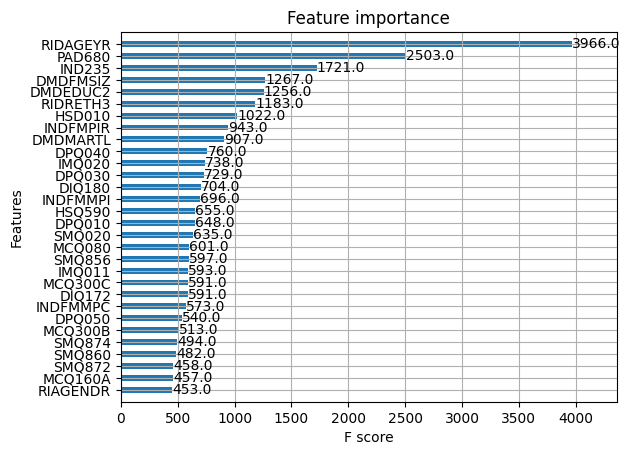

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(20,100))
# Plot feature importance

plot_importance(XGB_model,height = 0.5, max_num_features = 30)
#Feature Importance Plot: This plot gives you a sense of which features are most important in the model.
plt.show()

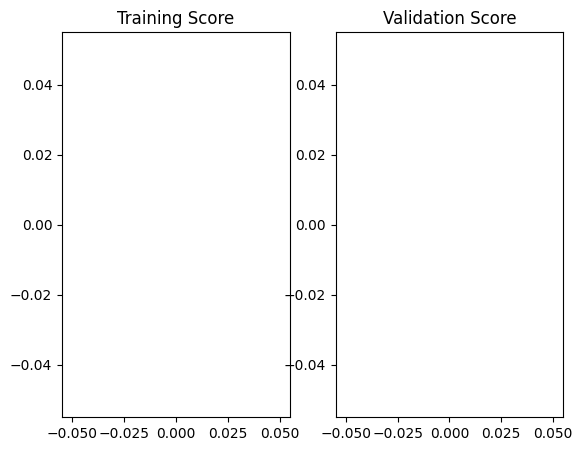

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(XGB_model,X_train_year1, Y_train_year1, train_sizes=np.linspace(0.1, 1.0, 5))

plt.figure(figsize=(10, 5))

# Plot training scores
plt.subplot(1, 3, 1)
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.title('Training Score')
# Plot validation scores
plt.subplot(1, 3, 2)
plt.plot(train_sizes, np.mean(validation_scores, axis=1))
plt.title('Validation Score')
plt.show()

In order to retrain a model with new data, you can use incremental learning techniques provided by certain scikit-learn estimators. Many of these have an option to perform a partial_fit of the data, which means that you can incrementally train on small batches of data 1.

To illustrate how to retrain a model with new data, let's use the SGDClassifier as an example:

### SVM model - Support Vector Machines (SVMs)

In [ ]:
#Import svm model
from sklearn import svm

In [ ]:
X_train_year1.shape

(5167, 80)

In [ ]:
from sklearn.preprocessing import StandardScaler

   # Create a scaler object
scaler = StandardScaler()

   # Fit the scaler and transform the training data
X_train_scaled = scaler.fit_transform(X_train_year1)

   # Transform the test data
X_test_scaled = scaler.transform(x_test_year1)

   # Train the SVM on the scaled data
clf_SVM = svm.SVC(kernel='linear')
clf_SVM.fit(X_train_scaled, Y_train_year1)

SVC(kernel='linear')

In [ ]:
#Create a svm Classifier
#clf_SVM = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
#clf_SVM.fit(X_train_year1, Y_train_year1)

#Predict the response for test dataset
y_pred = clf_SVM.predict(x_test_year1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:

mse = mean_squared_error(y_test_year1, y_pred)
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))

MSE: 0.5797213622291022
RMSE: 0.7613943539514213


In [ ]:
X_train_year1.head(5)

,RIAGENDR,RIDAGEYR,RIDRETH3,DMQMILIZ,DMDEDUC2,DMDBORN4,DMDMARTL,DMDFMSIZ,INDFMPIR,HSD010,HSQ500,HSQ510,HSQ520,HSQ571,HSQ590,DIQ010,DIQ160,DIQ170,DIQ172,DIQ180,DIQ050,IMQ011,IMQ020,INQ020,INQ012,INQ030,INQ060,INQ080,INQ090,INQ132,INQ140,INQ150,IND235,INDFMMPI,INDFMMPC,MCQ010,MCQ053,MCQ080,MCQ092,MCQ160A,MCQ160N,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ160M,MCQ160G,MCQ160K,MCQ160O,MCQ160L,MCQ203,MCQ220,MCQ300B,MCQ300C,MCQ300A,PAQ605,PAQ620,PAQ635,PAQ650,PAQ665,PAD680,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,SMQ020,SMQ856,SMQ860,SMQ866,SMQ870,SMQ872,SMQ874,SMQ878,SMQ880
22095,1,37,6,2,5,2,1,2,3,2,1,2,2,2,2,2,2,2,1,2,2,3,3,1,2,2,2,2,2,2,1,2,8,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,2,2,2,2,1,1,540,0,0,0,2,0,0,0,0,0,2,1,1,1,1,2,2,1,2
26321,2,35,3,2,5,1,1,6,3,3,1,2,2,1,1,2,2,2,2,1,2,1,1,1,2,2,2,2,2,2,2,2,12,4,3,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,600,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,1,2
19689,1,16,1,-999,-999,1,-999,4,1,3,2,2,2,2,2,2,2,2,2,2,2,1,1,1,2,2,2,2,2,2,2,2,5,1,1,1,2,2,2,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,2,-999,1,-999,-999,2,2,2,2,1,360,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1,-999,2,-999,2,2,-999
25969,1,24,3,2,3,1,6,3,2,2,2,2,2,2,2,2,2,2,1,1,2,1,1,1,2,2,2,2,2,2,2,2,9,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,1,2,2,1,120,1,1,0,3,1,2,1,0,0,1,1,1,2,1,1,1,2,-999
24746,2,60,4,2,2,1,1,3,1,3,1,2,2,2,2,1,-999,-999,-999,-999,2,3,3,1,2,2,2,2,2,2,2,2,3,0,1,2,1,1,2,2,2,2,2,2,2,2,1,2,2,2,2,2,1,2,1,2,2,2,2,2,1,360,1,1,0,1,1,0,1,1,0,2,2,1,2,1,2,1,2,-999


In [ ]:
#Create a svm Classifier with RBF kernel
clf = svm.SVC(kernel='rbf')

#Train the model using the training sets
clf.fit(X_train_year1, Y_train_year1)

#Predict the response for test dataset
y_pred2 = clf.predict(x_test_year1)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_year1, y_pred2))

Accuracy: 0.7043343653250774


In [ ]:
mse = mean_squared_error(y_test_year1, y_pred2)
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))

MSE: 0.29566563467492263
RMSE: 0.543751445676168


In [ ]:
np.var(y_test_year1)

0.2233289641422807

In [ ]:
# tests

### Random Forrest

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

# Assume X is your features and y is your target
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
RFC = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the model using the training sets
RFC.fit(X_train_year1, Y_train_year1)



RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
# Predict the response for test dataset
y_pred = RFC.predict(x_test_year1)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_year1, y_pred))

# Model Precision, Recall, F-score
print("Classification Report:\n", classification_report(y_test_year1, y_pred))

Accuracy: 0.7639318885448917
Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.65      0.65       435
           2       0.82      0.82      0.82       857

    accuracy                           0.76      1292
   macro avg       0.74      0.74      0.74      1292
weighted avg       0.76      0.76      0.76      1292



In [ ]:
precision_rf = precision_score(y_test_year1, y_pred)
recall_rf = recall_score(y_test_year1, y_pred)
f1_rf = f1_score(y_test_year1, y_pred)
r2_rf = r2_score(y_test_year1, y_pred)
mse = mean_squared_error(y_test_year1, y_pred)

print(precision_rf,recall_rf,f1_rf,mse, r2_rf)

0.6490825688073395 0.6505747126436782 0.6498277841561424 0.23606811145510836 -0.057042074062152004


In [ ]:
RFC.fit(X_train_year2, Y_train_year2)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
x_test_year1.head(4)

,RIAGENDR,RIDAGEYR,RIDRETH3,DMQMILIZ,DMDEDUC2,DMDBORN4,DMDMARTL,DMDFMSIZ,INDFMPIR,HSD010,HSQ500,HSQ510,HSQ520,HSQ571,HSQ590,DIQ010,DIQ160,DIQ170,DIQ172,DIQ180,DIQ050,IMQ011,IMQ020,INQ020,INQ012,INQ030,INQ060,INQ080,INQ090,INQ132,INQ140,INQ150,IND235,INDFMMPI,INDFMMPC,MCQ010,MCQ053,MCQ080,MCQ092,MCQ160A,MCQ160N,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ160M,MCQ160G,MCQ160K,MCQ160O,MCQ160L,MCQ203,MCQ220,MCQ300B,MCQ300C,MCQ300A,PAQ605,PAQ620,PAQ635,PAQ650,PAQ665,PAD680,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,SMQ020,SMQ856,SMQ860,SMQ866,SMQ870,SMQ872,SMQ874,SMQ878,SMQ880
28678,2,80,3,2,3,1,2,1,1,5,2,2,2,2,2,2,-999,1,1,1,2,3,3,2,2,1,2,2,2,2,1,2,5,2,3,2,2,2,2,1,2,1,1,2,1,2,2,2,1,2,2,2,2,2,1,2,2,2,2,2,1,420,0,0,0,0,0,0,0,0,0,1,2,2,2,2,-999,2,2,-999
25773,1,62,4,2,5,1,6,3,1,2,2,1,2,2,2,2,2,2,1,1,2,3,3,1,2,2,2,2,2,2,2,2,5,1,1,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,240,3,1,3,3,1,0,3,3,0,2,2,1,1,1,2,2,2,-999
25457,1,25,3,2,4,1,6,1,2,-999,-999,-999,-999,-999,-999,2,2,2,2,2,2,3,1,1,2,2,2,2,2,2,1,2,9,5,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,120,-999,-999,-999,-999,-999,-999,-999,-999,-999,1,1,2,2,2,-999,2,2,-999
23239,2,18,7,2,-999,1,-999,4,0,2,2,2,2,2,2,2,2,2,2,2,2,-999,-999,1,2,2,2,2,1,2,2,1,4,0,1,2,2,2,2,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,2,-999,2,-999,-999,2,2,1,2,1,600,0,0,0,0,0,0,0,0,0,1,2,1,2,1,2,2,1,1


In [ ]:
x_test_year2.head(4)

,RIAGENDR,RIDAGEYR,RIDRETH3,DMQMILIZ,DMDEDUC2,DMDBORN4,DMDMARTL,DMDFMSIZ,INDFMPIR,HSD010,HSQ500,HSQ510,HSQ520,HSQ571,HSQ590,DIQ010,DIQ160,DIQ170,DIQ172,DIQ180,DIQ050,IMQ011,IMQ020,INQ020,INQ012,INQ030,INQ060,INQ080,INQ090,INQ132,INQ140,INQ150,IND235,INDFMMPI,INDFMMPC,MCQ010,MCQ053,MCQ080,MCQ092,MCQ160A,MCQ160N,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ160M,MCQ160G,MCQ160K,MCQ160O,MCQ160L,MCQ203,MCQ220,MCQ300B,MCQ300C,MCQ300A,PAQ605,PAQ620,PAQ635,PAQ650,PAQ665,PAD680,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,SMQ020,SMQ856,SMQ860,SMQ866,SMQ870,SMQ872,SMQ874,SMQ878,SMQ880
15384,2,60,4,2,4,1,1,2,3,4,2,2,2,2,2,1,-999,-999,-999,-999,2,3,1,1,2,1,1,2,2,2,2,2,8,3,3,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,720,1,0,0,2,1,0,0,0,0,1,1,2,2,1,2,1,2,-999
10898,2,21,4,2,3,1,5,1,1,4,2,2,2,2,1,2,2,2,2,2,2,-999,-999,1,2,2,2,2,2,2,2,1,1,0,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,-999,-999,2,1,1,2,1,240,0,1,1,1,1,1,0,0,1,1,1,1,2,1,1,1,2,-999
15256,2,72,1,2,1,2,1,1,-999,3,2,2,2,2,2,2,2,2,2,1,2,3,3,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,300,0,0,0,0,0,0,0,0,0,2,2,1,2,1,2,2,2,-999
13167,2,42,3,2,2,1,1,4,2,4,2,2,2,2,1,1,-999,-999,-999,-999,2,3,3,1,2,2,2,2,2,2,1,2,9,2,3,2,2,1,2,2,2,2,2,2,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,1,600,0,0,1,1,1,0,1,0,0,1,1,1,2,1,2,2,2,-999


In [ ]:
# Predict the response for test dataset
y_pred2 = RFC.predict(x_test_year2)

mse = mean_squared_error(y_test_year2, y_pred2)
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))


# Model Accuracy
#print("Accuracy:",metrics.accuracy_score(y_test_year2, y_pred2))

# Model Precision, Recall, F-score
#print("Classification Report:\n", classification_report(y_test_year2, y_pred2))

MSE: 0.25533596837944667
RMSE: 0.5053077956844191


## GradientBoostingClassifier

### Initial Code

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
x_test_year1.head()

,RIAGENDR,RIDAGEYR,RIDRETH3,DMQMILIZ,DMDEDUC2,DMDBORN4,DMDMARTL,DMDFMSIZ,INDFMPIR,HSD010,HSQ500,HSQ510,HSQ520,HSQ571,HSQ590,DIQ010,DIQ160,DIQ170,DIQ172,DIQ180,DIQ050,IMQ011,IMQ020,INQ020,INQ012,INQ030,INQ060,INQ080,INQ090,INQ132,INQ140,INQ150,IND235,INDFMMPI,INDFMMPC,MCQ010,MCQ053,MCQ080,MCQ092,MCQ160A,MCQ160N,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ160M,MCQ160G,MCQ160K,MCQ160O,MCQ160L,MCQ203,MCQ220,MCQ300B,MCQ300C,MCQ300A,PAQ605,PAQ620,PAQ635,PAQ650,PAQ665,PAD680,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,SMQ020,SMQ856,SMQ860,SMQ866,SMQ870,SMQ872,SMQ874,SMQ878,SMQ880
28678,2,80,3,2,3,1,2,1,1,5,2,2,2,2,2,2,-999,1,1,1,2,3,3,2,2,1,2,2,2,2,1,2,5,2,3,2,2,2,2,1,2,1,1,2,1,2,2,2,1,2,2,2,2,2,1,2,2,2,2,2,1,420,0,0,0,0,0,0,0,0,0,1,2,2,2,2,-999,2,2,-999
25773,1,62,4,2,5,1,6,3,1,2,2,1,2,2,2,2,2,2,1,1,2,3,3,1,2,2,2,2,2,2,2,2,5,1,1,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,240,3,1,3,3,1,0,3,3,0,2,2,1,1,1,2,2,2,-999
25457,1,25,3,2,4,1,6,1,2,-999,-999,-999,-999,-999,-999,2,2,2,2,2,2,3,1,1,2,2,2,2,2,2,1,2,9,5,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,120,-999,-999,-999,-999,-999,-999,-999,-999,-999,1,1,2,2,2,-999,2,2,-999
23239,2,18,7,2,-999,1,-999,4,0,2,2,2,2,2,2,2,2,2,2,2,2,-999,-999,1,2,2,2,2,1,2,2,1,4,0,1,2,2,2,2,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,2,-999,2,-999,-999,2,2,1,2,1,600,0,0,0,0,0,0,0,0,0,1,2,1,2,1,2,2,1,1
28623,2,45,3,2,5,1,5,2,5,-999,-999,-999,-999,-999,-999,2,2,2,2,1,2,3,3,1,2,2,2,2,2,2,2,2,12,5,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,720,-999,-999,-999,-999,-999,-999,-999,-999,-999,1,1,1,2,2,-999,2,1,2


In [ ]:
GNC_model = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=1, random_state=42)
GNC_model.fit(X_train_year1, Y_train_year1)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=200,
                           random_state=42)

In [ ]:
GNC_model.feature_importances_

array([4.53269482e-04, 6.25695399e-01, 3.64061283e-02, 6.26968716e-04,
       1.19662181e-02, 5.57337702e-04, 2.43175858e-03, 8.92320990e-04,
       3.89015907e-03, 3.04220889e-02, 1.34141039e-03, 2.58681316e-03,
       1.99721896e-03, 9.78057375e-04, 1.88440270e-04, 2.58926936e-04,
       6.04881493e-02, 0.00000000e+00, 4.47288144e-04, 5.46249058e-03,
       1.96704752e-03, 1.12561702e-03, 1.60376131e-03, 8.37432457e-04,
       1.35187236e-03, 2.25151158e-04, 1.70919765e-04, 1.83108030e-04,
       0.00000000e+00, 0.00000000e+00, 3.62998710e-04, 3.02902230e-03,
       3.05637440e-03, 2.31645383e-03, 0.00000000e+00, 0.00000000e+00,
       1.35598612e-03, 1.27461700e-01, 8.21310043e-03, 3.03069271e-03,
       7.73245480e-04, 0.00000000e+00, 1.62790362e-03, 0.00000000e+00,
       3.23229816e-03, 8.27656438e-04, 0.00000000e+00, 9.80623291e-04,
       2.33109234e-04, 0.00000000e+00, 0.00000000e+00, 1.68878607e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.85154343e-03,
      

In [ ]:
y_pred = GNC_model.predict(x_test_year1)
mse = mean_squared_error(y_test_year1, y_pred)
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))

MSE: 0.21052631578947367
RMSE: 0.45883146774112354


In [ ]:
print("Accuracy score: ", accuracy_score(y_test_year1, y_pred))
#Model Precision, Recall, F-score
print("Classification Report:\n", classification_report(y_test_year1, y_pred))

Accuracy score:  0.7894736842105263
Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.63      0.67       435
           2       0.82      0.87      0.85       857

    accuracy                           0.79      1292
   macro avg       0.77      0.75      0.76      1292
weighted avg       0.79      0.79      0.79      1292



In [ ]:
precision_gb = precision_score(y_test_year1, y_pred)
recall_gb = recall_score(y_test_year1, y_pred)
f1_gb = f1_score(y_test_year1, y_pred)
r2_gb = r2_score(y_test_year1, y_pred)
mse_gb = mean_squared_error(y_test_year1, y_pred)

print(precision_gb,recall_gb,f1_gb, mse_gb, r2_gb)

0.7095115681233933 0.6344827586206897 0.6699029126213593 0.21052631578947367 0.057326412639654656


In [ ]:
X_train_year2, x_test_year2, Y_train_year2, y_test_year2 = splitting_data(year2,'BPQ020')

In [ ]:
GNC_model.fit(X_train_year2, Y_train_year2)
y_pred22 = GNC_model.predict(x_test_year2)

In [ ]:
x_test_year2.head(5)

,RIAGENDR,RIDAGEYR,RIDRETH3,DMQMILIZ,DMDEDUC2,DMDBORN4,DMDMARTL,DMDFMSIZ,INDFMPIR,HSD010,HSQ500,HSQ510,HSQ520,HSQ571,HSQ590,DIQ010,DIQ160,DIQ170,DIQ172,DIQ180,DIQ050,IMQ011,IMQ020,INQ020,INQ012,INQ030,INQ060,INQ080,INQ090,INQ132,INQ140,INQ150,IND235,INDFMMPI,INDFMMPC,MCQ010,MCQ053,MCQ080,MCQ092,MCQ160A,MCQ160N,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ160M,MCQ160G,MCQ160K,MCQ160O,MCQ160L,MCQ203,MCQ220,MCQ300B,MCQ300C,MCQ300A,PAQ605,PAQ620,PAQ635,PAQ650,PAQ665,PAD680,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,SMQ020,SMQ856,SMQ860,SMQ866,SMQ870,SMQ872,SMQ874,SMQ878,SMQ880
15384,2,60,4,2,4,1,1,2,3,4,2,2,2,2,2,1,-999,-999,-999,-999,2,3,1,1,2,1,1,2,2,2,2,2,8,3,3,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,720,1,0,0,2,1,0,0,0,0,1,1,2,2,1,2,1,2,-999
10898,2,21,4,2,3,1,5,1,1,4,2,2,2,2,1,2,2,2,2,2,2,-999,-999,1,2,2,2,2,2,2,2,1,1,0,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,-999,-999,2,1,1,2,1,240,0,1,1,1,1,1,0,0,1,1,1,1,2,1,1,1,2,-999
15256,2,72,1,2,1,2,1,1,-999,3,2,2,2,2,2,2,2,2,2,1,2,3,3,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,300,0,0,0,0,0,0,0,0,0,2,2,1,2,1,2,2,2,-999
13167,2,42,3,2,2,1,1,4,2,4,2,2,2,2,1,1,-999,-999,-999,-999,2,3,3,1,2,2,2,2,2,2,1,2,9,2,3,2,2,1,2,2,2,2,2,2,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,1,600,0,0,1,1,1,0,1,0,0,1,1,1,2,1,2,2,2,-999
12724,1,39,4,2,3,1,1,2,3,4,1,2,2,2,2,2,2,2,2,1,2,3,3,1,1,2,2,2,2,2,2,2,6,2,3,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,1,2,1,1,300,0,0,2,0,0,2,1,0,0,2,1,1,2,1,2,2,2,-999


In [ ]:
print("Classification Report:\n", classification_report(y_test_year2, y_pred22))

Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.60      0.65       418
           2       0.82      0.87      0.84       847

    accuracy                           0.78      1265
   macro avg       0.76      0.74      0.74      1265
weighted avg       0.78      0.78      0.78      1265



In [ ]:
year3_TEST = year3.drop(columns = ['SEQN','BPQ020','BPQ080'])
year3_TEST = year3_TEST.fillna('-999')
year3_TEST = year3_TEST.astype(int)

y_test_year3 = year3['BPQ020']
y_pred_year3 = GNC_model.predict(year3_TEST)

In [ ]:
print("Classification Report:\n", classification_report(y_test_year3, y_pred_year3))

Classification Report:
               precision    recall  f1-score   support

         1.0       0.67      0.63      0.65      2137
         2.0       0.81      0.84      0.82      4014

    accuracy                           0.76      6151
   macro avg       0.74      0.73      0.74      6151
weighted avg       0.76      0.76      0.76      6151



In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
print(roc_auc_score(y_test_year3, y_pred_year3))

0.7322287879180006


In [ ]:
from sklearn.tree import plot_tree


In [ ]:
stree = GNC_model.fit(X_train_year1, Y_train_year1).estimators_[20,0]
features_y1 = X_train_year1.columns.tolist()

[Text(0.5, 0.75, 'DMDEDUC2 <= 3.5\nfriedman_mse = 0.152\nsamples = 5167\nvalue = 0.0'),
 Text(0.25, 0.25, 'friedman_mse = 0.145\nsamples = 2568\nvalue = 0.098'),
 Text(0.75, 0.25, 'friedman_mse = 0.16\nsamples = 2599\nvalue = -0.092')]

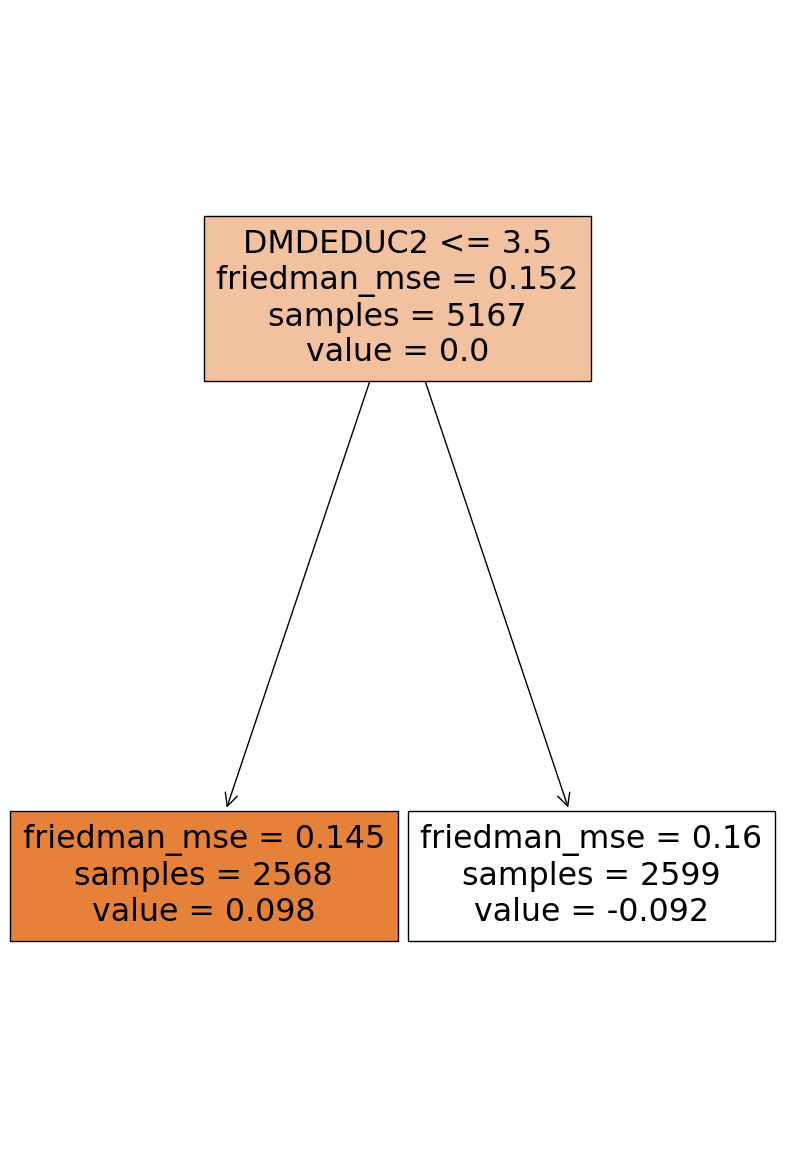

In [ ]:
# Plot the tree
plt.figure(figsize=(10, 15))
plot_tree(stree, filled=True, feature_names=features_y1)

### Model Finetuning

In [ ]:
from sklearn.model_selection import GridSearchCV
#(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

In [ ]:
parameters  = {
    'n_estimators': [100,200],
    'max_depth': [3,5,7,9],
    'learning_rate': [0.01, 0.1],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [1,3,5],
    'subsample': [0.2, 0.8,1],
    'random_state' :[42,84, 126] ,
    'max_features': ['sqrt', 'log2']
}


In [ ]:
#model_GB_v2 = GradientBoostingClassifier()
#gscv = GridSearchCV(model_GB_v2, parameters, scoring='roc_auc', cv=5, verbose=3, refit = True)
#gscv.fit(X_train_year1, Y_train_year1)

In [ ]:
#best_parameters = gscv.best_params_
#best_estimator = gscv.best_estimator_
#print("Best parameters:",best_parameters,"\nBest estimator:", best_estimator)

Best parameters: {'learning_rate': 0.1, 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42, 'subsample': 0.2}
Best estimator: GradientBoostingClassifier(max_depth=1, max_features='sqrt', min_samples_leaf=5,
                           n_estimators=200, random_state=42, subsample=0.2)

In [ ]:
GNC_model_BEST_y1 = GradientBoostingClassifier(max_depth=2, max_features='sqrt', n_estimators=200,
                           random_state=42, subsample=0.8)
GNC_model_BEST_y1.fit(X_train_year1, Y_train_year1)

GradientBoostingClassifier(max_depth=2, max_features='sqrt', n_estimators=200,
                           random_state=42, subsample=0.8)

In [ ]:
y_pred_best_y1 = GNC_model_BEST_y1.predict(x_test_year1)
mse = mean_squared_error(y_test_year1, y_pred_best_y1)
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))

MSE: 0.21594427244582043
RMSE: 0.4646980443748612


In [ ]:
print("Accuracy score: ", accuracy_score(y_test_year1, y_pred_best_y1))
#Model Precision, Recall, F-score
print("Classification Report:\n", classification_report(y_test_year1, y_pred_best_y1))

Accuracy score:  0.7840557275541795
Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.63      0.66       435
           2       0.82      0.86      0.84       857

    accuracy                           0.78      1292
   macro avg       0.76      0.75      0.75      1292
weighted avg       0.78      0.78      0.78      1292



In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [ ]:
Cross_val_scores = cross_val_score(GNC_model_BEST_y1, X_train_year1, Y_train_year1, cv=10, scoring = "roc_auc")
features_arrays = list(GNC_model_BEST_y1.feature_importances_)
features = X_train_year1.columns.to_list()
importance = dict(zip(features,features_arrays))

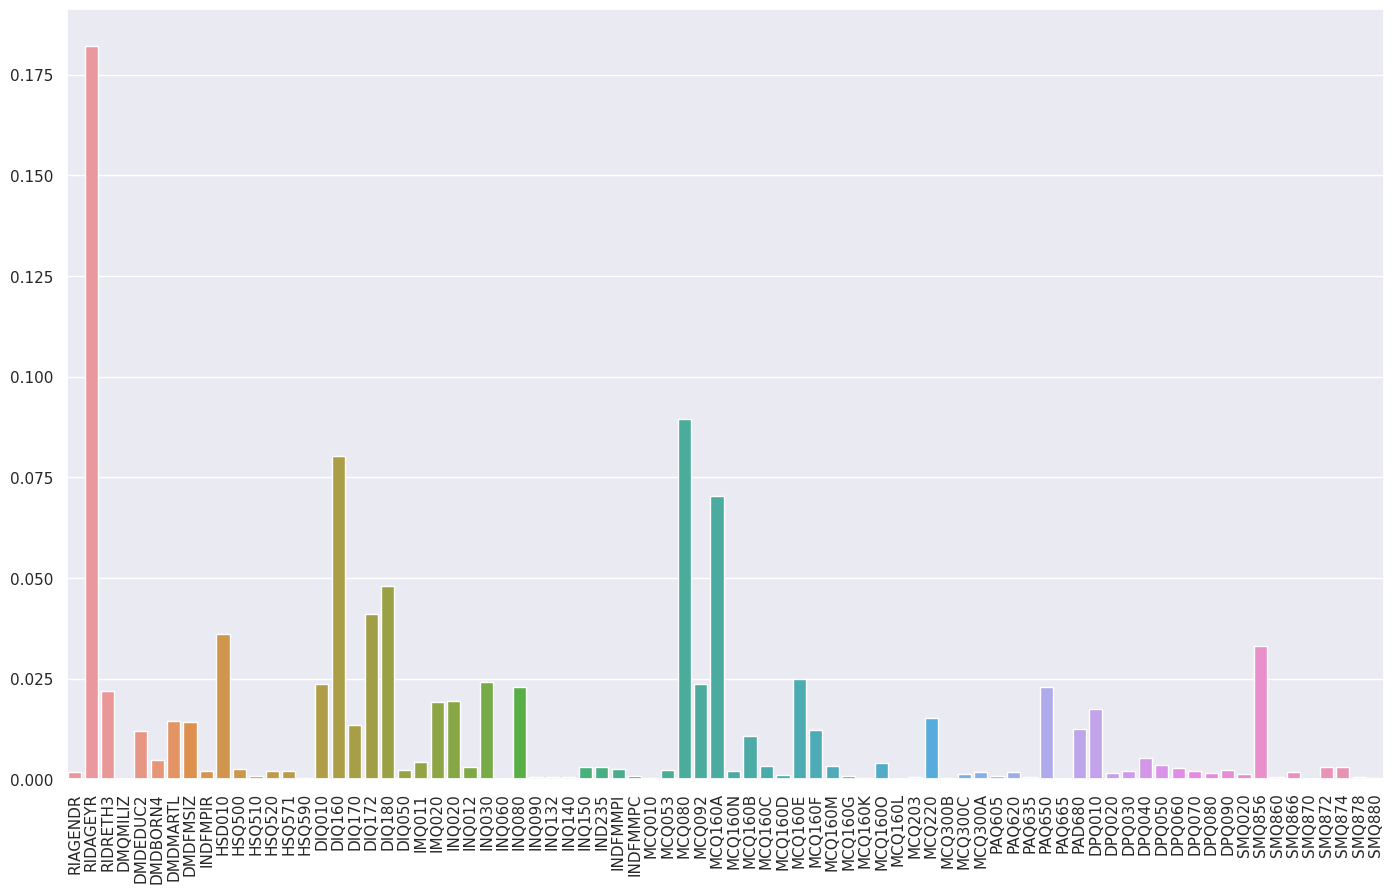

In [ ]:
sns.set(rc={'figure.figsize':(17,10)})
sns.barplot(x = list(importance.keys()), y = list(importance.values()))
#sns.barplot(x = importance.keys(), y = importance.values())
plt.xticks(rotation=90);

In [ ]:
year1_Plain_df.columns

Index(['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'DMQMILIZ', 'DMDEDUC2',
       'DMDBORN4', 'DMDMARTL', 'DMDFMSIZ', 'INDFMPIR', 'BPQ020', 'BPQ080',
       'HSD010', 'HSQ500', 'HSQ510', 'HSQ520', 'HSQ571', 'HSQ590', 'DIQ010',
       'DIQ160', 'DIQ170', 'DIQ172', 'DIQ180', 'DIQ050', 'IMQ011', 'IMQ020',
       'INQ020', 'INQ012', 'INQ030', 'INQ060', 'INQ080', 'INQ090', 'INQ132',
       'INQ140', 'INQ150', 'IND235', 'INDFMMPI', 'INDFMMPC', 'MCQ010',
       'MCQ053', 'MCQ080', 'MCQ092', 'MCQ160A', 'MCQ160N', 'MCQ160B',
       'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ160F', 'MCQ160M', 'MCQ160G',
       'MCQ160K', 'MCQ160O', 'MCQ160L', 'MCQ203', 'MCQ220', 'MCQ300B',
       'MCQ300C', 'MCQ300A', 'PAQ605', 'PAQ620', 'PAQ635', 'PAQ650', 'PAQ665',
       'PAD680', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'SMQ020', 'SMQ856', 'SMQ860', 'SMQ866',
       'SMQ870', 'SMQ872', 'SMQ874', 'SMQ878', 'SMQ880'],
      dtype='object')

# features = ['BPQ020', 'DIQ170', 'DPQ020', 'SMQ020']

## imports

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from xgboost import plot_tree
!pip install shap
import shap
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

scaler = StandardScaler()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.9 MB/s eta 0:00:00


## Functions

In [ ]:
def get_years(col):
  global year1_Plain_df
  global year2_Plain_df
  global year3_Plain_df
  scaler

  year1_Plain_df['RIDAGEYR'] = scaler.fit_transform(np.array(year1_Plain_df[['RIDAGEYR']]))
  year1_Plain_df['IND235'] = scaler.fit_transform(np.array(year1_Plain_df[['IND235']]))
  year1_Plain_df['PAD680'] = scaler.fit_transform(np.array(year1_Plain_df[['PAD680']]))

  year2_Plain_df['RIDAGEYR'] = scaler.fit_transform(np.array(year2_Plain_df[['RIDAGEYR']]))
  year2_Plain_df['IND235'] = scaler.fit_transform(np.array(year2_Plain_df[['IND235']]))
  year2_Plain_df['PAD680'] = scaler.fit_transform(np.array(year2_Plain_df[['PAD680']]))

  year3_Plain_df['RIDAGEYR'] = scaler.fit_transform(np.array(year3_Plain_df[['RIDAGEYR']]))
  year3_Plain_df['IND235'] = scaler.fit_transform(np.array(year3_Plain_df[['IND235']]))
  year3_Plain_df['PAD680'] = scaler.fit_transform(np.array(year3_Plain_df[['PAD680']]))

  print(col)

  features_of_importance = ({'BPQ020':['BPQ080'],
                            'DIQ010':['DIQ160','DIQ172', 'DIQ180', 'DIQ050','DIQ170'],
                            'DPQ020':['DPQ010','DPQ030','DPQ040','DPQ050','DPQ060','DPQ070', 'DPQ080', 'DPQ090'],
                            'SMQ020':['SMQ856', 'SMQ860', 'SMQ866', 'SMQ870', 'SMQ872', 'SMQ874', 'SMQ878','SMQ880']})

  col_list_drop = features_of_importance[col]
  col_list_drop.append(col)

  print("year 1:")
  year1_df = take_na_year(year1_Plain_df,col)
  print("year 2:")
  year2_df = take_na_year(year2_Plain_df, col)
  print("year 3:")
  year3_df = take_na_year(year3_Plain_df,col)



  X_train_year1, x_test_year1, Y_train_year1, y_test_year1 = splitting_data(year1_df,col)

  X_train_year2, x_test_year2, Y_train_year2, y_test_year2 = splitting_data(year2_df,col)

  year3_TEST = year3_df.drop(columns = col_list_drop)
  year3_TEST = year3_TEST.drop(columns = 'SEQN')
  year3_TEST = year3_TEST.fillna('-999')
  year3_TEST = year3_TEST.astype(int)


  y_test_year3 = year3_df[col]

  y_test_year3 = y_test_year3.fillna('-999')

  y_test_year3 = y_test_year3.astype(int)



  return X_train_year1, x_test_year1, Y_train_year1, y_test_year1, X_train_year2, x_test_year2, Y_train_year2, y_test_year2, year3_TEST, y_test_year3

In [ ]:
def model_by_years(X_train_year1, x_test_year1, Y_train_year1, y_test_year1, X_train_year2, x_test_year2, Y_train_year2, y_test_year2, year3_TEST, y_test_year3, col):

  GNC_model_BEST_ = GradientBoostingClassifier(max_depth=2, max_features='sqrt', n_estimators=200,
                           random_state=42, subsample=0.8)

  GNC_model_BEST_.fit(X_train_year1, Y_train_year1)

  y_pred1 = GNC_model_BEST_.predict(x_test_year1)

  learning_cur(X_train_year1, Y_train_year1)
  print(f"Accuracy score YEAR 1 {col}: ", accuracy_score(y_test_year1, y_pred1))
  #Model Precision, Recall, F-score
  print("Classification Report:\n", classification_report(y_test_year1, y_pred1))

  GNC_model_BEST_.fit(X_train_year2, Y_train_year2)
  y_pred2 = GNC_model_BEST_.predict(x_test_year2)

  learning_cur(X_train_year2, Y_train_year2)
  print(f"Accuracy score: YEAR 2 {col}", accuracy_score(y_test_year2, y_pred2))
  #Model Precision, Recall, F-score
  print("Classification Report:\n", classification_report(y_test_year2, y_pred2))

  y_pred3 = GNC_model_BEST_.predict(year3_TEST)
  print(f"Accuracy score: YEAR 3 {col}", accuracy_score(y_test_year3, y_pred3))
  print("Classification Report:\n", classification_report(y_test_year3, y_pred3))


  ###########################################
  """--------------------------------------------------------------------"""
    # Create a new figure and a subplot
  #fig, ax = plt.subplots()

  # Plot the lines
  #ax.lineplot(y_pred1, color = 'green',label=f'Year 1 {col}')
  #ax.lineplot(y_pred2, color = 'red',  label=f'Year 2 {col}')
  #ax.lineplot(y_pred3, color = 'blue', label=f'Year 3 {col}')

  # Add a legend
  #ax.legend()

  # Show the plot
  #plt.show()


In [ ]:
def f_imp(X_train, Y_train):
  XGB_model_func = XGBClassifier(n_estimators=1000, learning_rate=0.05)
  XGB_model_func.fit(X_train, Y_train)
  plt.figure(figsize=(20,100))

  # Plot feature importance
  plot_importance(XGB_model_func,height = 0.5, max_num_features = 30)
  plt.show()

def f_TREE(X_train, Y_train):
  XGB_model_func = XGBClassifier(n_estimators=1000, learning_rate=0.05)
  XGB_model_func.fit(X_train, Y_train)
  plot_tree(XGB_model_func, num_trees=4, rankdir='LR')
  #Feature Importance Plot: This plot gives you a sense of which features are most important in the model.
  plt.show()

def class_rep(X_train, Y_train,x_test,y_test):
  GNC_model_BEST_ = GradientBoostingClassifier(max_depth=2, max_features='sqrt', n_estimators=200,
                           random_state=42, subsample=0.8)
  GNC_model_BEST_.fit(X_train, Y_train)
  y_pred0 = GNC_model_BEST_.predict(x_test)
  print("Accuracy score: ", accuracy_score(y_test, y_pred0))
  #Model Precision, Recall, F-score
  print("Classification Report:\n", classification_report(y_test, y_pred0))

def ft_gbc(X_train, Y_train,X_test):
  GNC_model_BEST_ = GradientBoostingClassifier(max_depth=2, max_features='sqrt', n_estimators=200,
                           random_state=42, subsample=0.8)
  GNC_model_BEST_.fit(X_train, Y_train)


  explainer = shap.TreeExplainer(GNC_model_BEST_)
  shap_values = explainer.shap_values(X_test)

  shap.summary_plot(shap_values, X_test, plot_type="bar")


def permu_imp(X_train,Y_train,X_test, y_test):
  GNC_model_BEST_ = GradientBoostingClassifier(max_depth=2, max_features='sqrt', n_estimators=200,
                           random_state=42, subsample=0.8)
  GNC_model_BEST_.fit(X_train, Y_train)

  result = permutation_importance(GNC_model_BEST_, X_test, y_test, n_repeats=10, random_state=0)
  plt.boxplot(result.importances[np.argsort(result.importances)],
               vert=False, labels=X_test.columns)
  plt.title("Permutation Importance")
  plt.show()

def cmheat(X_train, Y_train,X_test,y_test ):
  GNC_model_BEST_ = GradientBoostingClassifier(max_depth=2, max_features='sqrt', n_estimators=200,
                           random_state=42, subsample=0.8)
  GNC_model_BEST_.fit(X_train, Y_train)

# Predict the test set results
  y_pred0 = GNC_model_BEST_.predict(X_test)

  # Create the confusion matrix
  cm = confusion_matrix(y_test, y_pred0)

  # Visualize the confusion matrix
  sns.heatmap(cm, annot=True, fmt='d')
  plt.show()

In [ ]:
def learning_cur(X_train, Y_train,):
  GNC_model_BEST_ = GradientBoostingClassifier(max_depth=2, max_features='sqrt', n_estimators=200,
                            random_state=42, subsample=0.8)
  #GNC_model_BEST_.fit(X_train, Y_train)

  # Predict the test set results
  #y_pred0 = GNC_model_BEST_.predict(X_test)


  train_sizes, train_scores, test_scores = learning_curve(GNC_model_BEST_, X_train, Y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

  # Calculate mean and standard deviation for training set scores
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)

  # Calculate mean and standard deviation for test set scores
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  # Plot the learning curve
  plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
  plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

  # Draw bands
  plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
  plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

  # Create plot
  plt.title("Learning Curve")
  plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
  plt.tight_layout()
  plt.show()

## **BPQ020**

In [ ]:
X_train_year1_bpq, x_test_year1_bpq, Y_train_year1_bpq, y_test_year1_bpq,\
X_train_year2_bpq, x_test_year2_bpq, Y_train_year2_bpq, y_test_year2_bpq,\
x_test_year3_bpq, y_test_year3_bpq = get_years('BPQ020')

BPQ020
year 1:
(6459, 83)
year 2:
(6321, 83)
year 3:
(6151, 83)


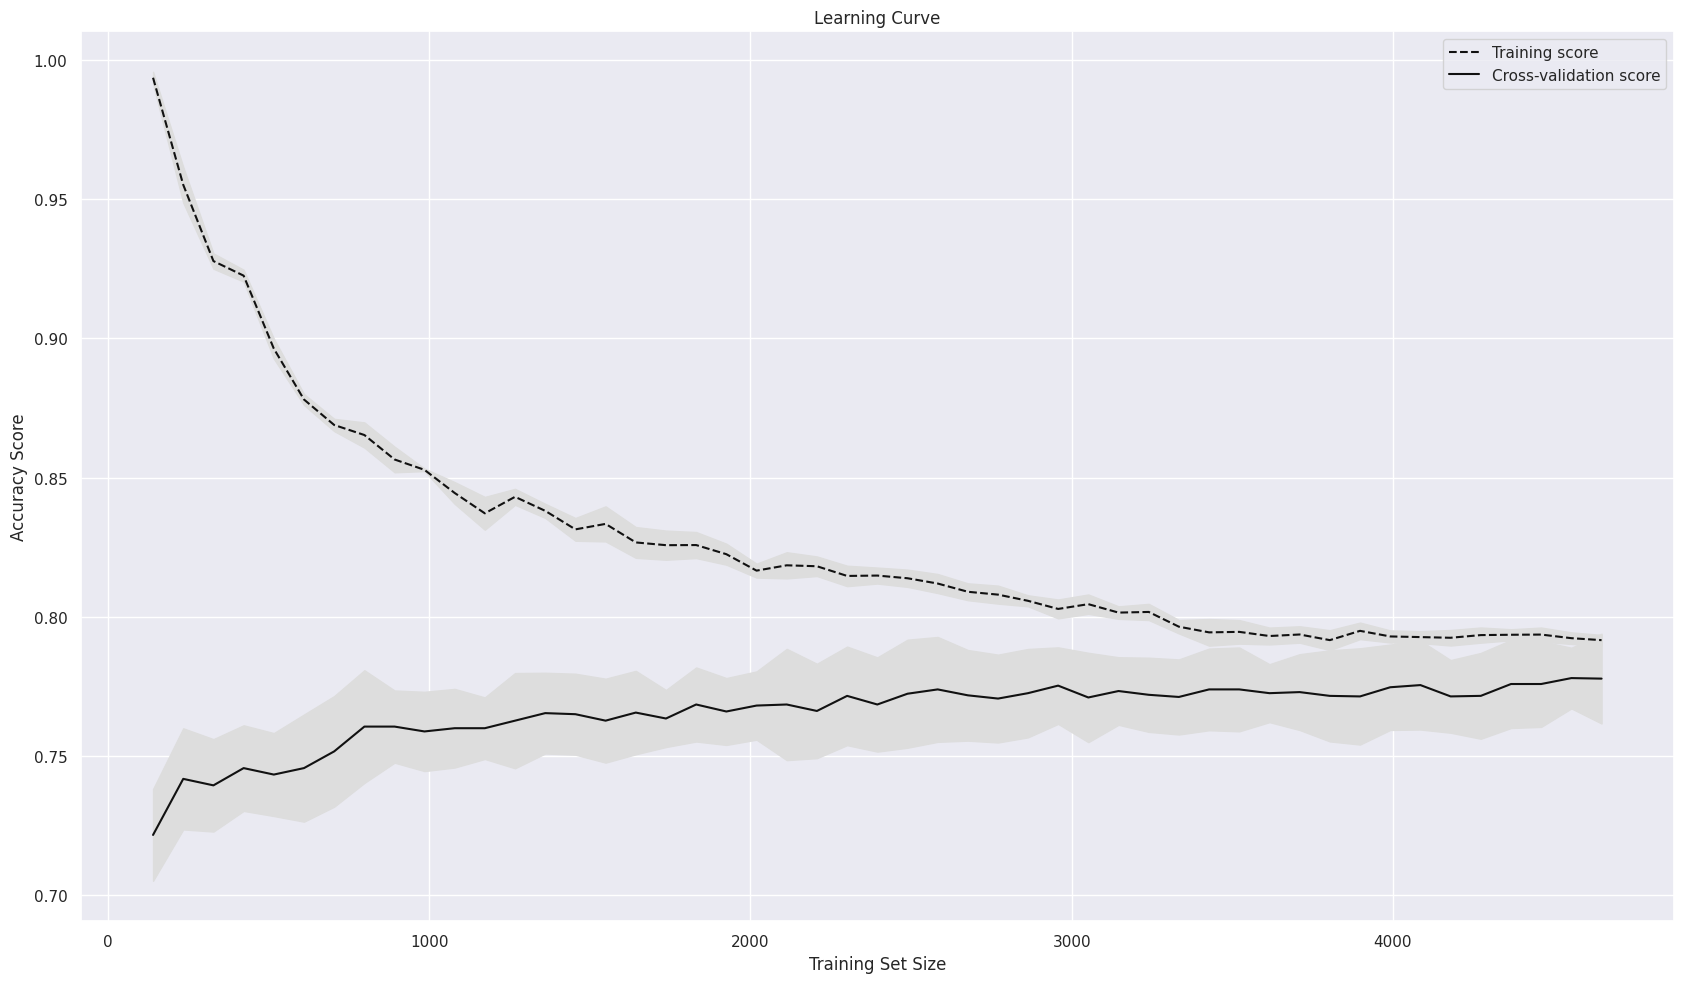

Accuracy score YEAR 1 BPQ020:  0.7763157894736842
Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.59      0.64       435
           2       0.81      0.87      0.84       857

    accuracy                           0.78      1292
   macro avg       0.75      0.73      0.74      1292
weighted avg       0.77      0.78      0.77      1292



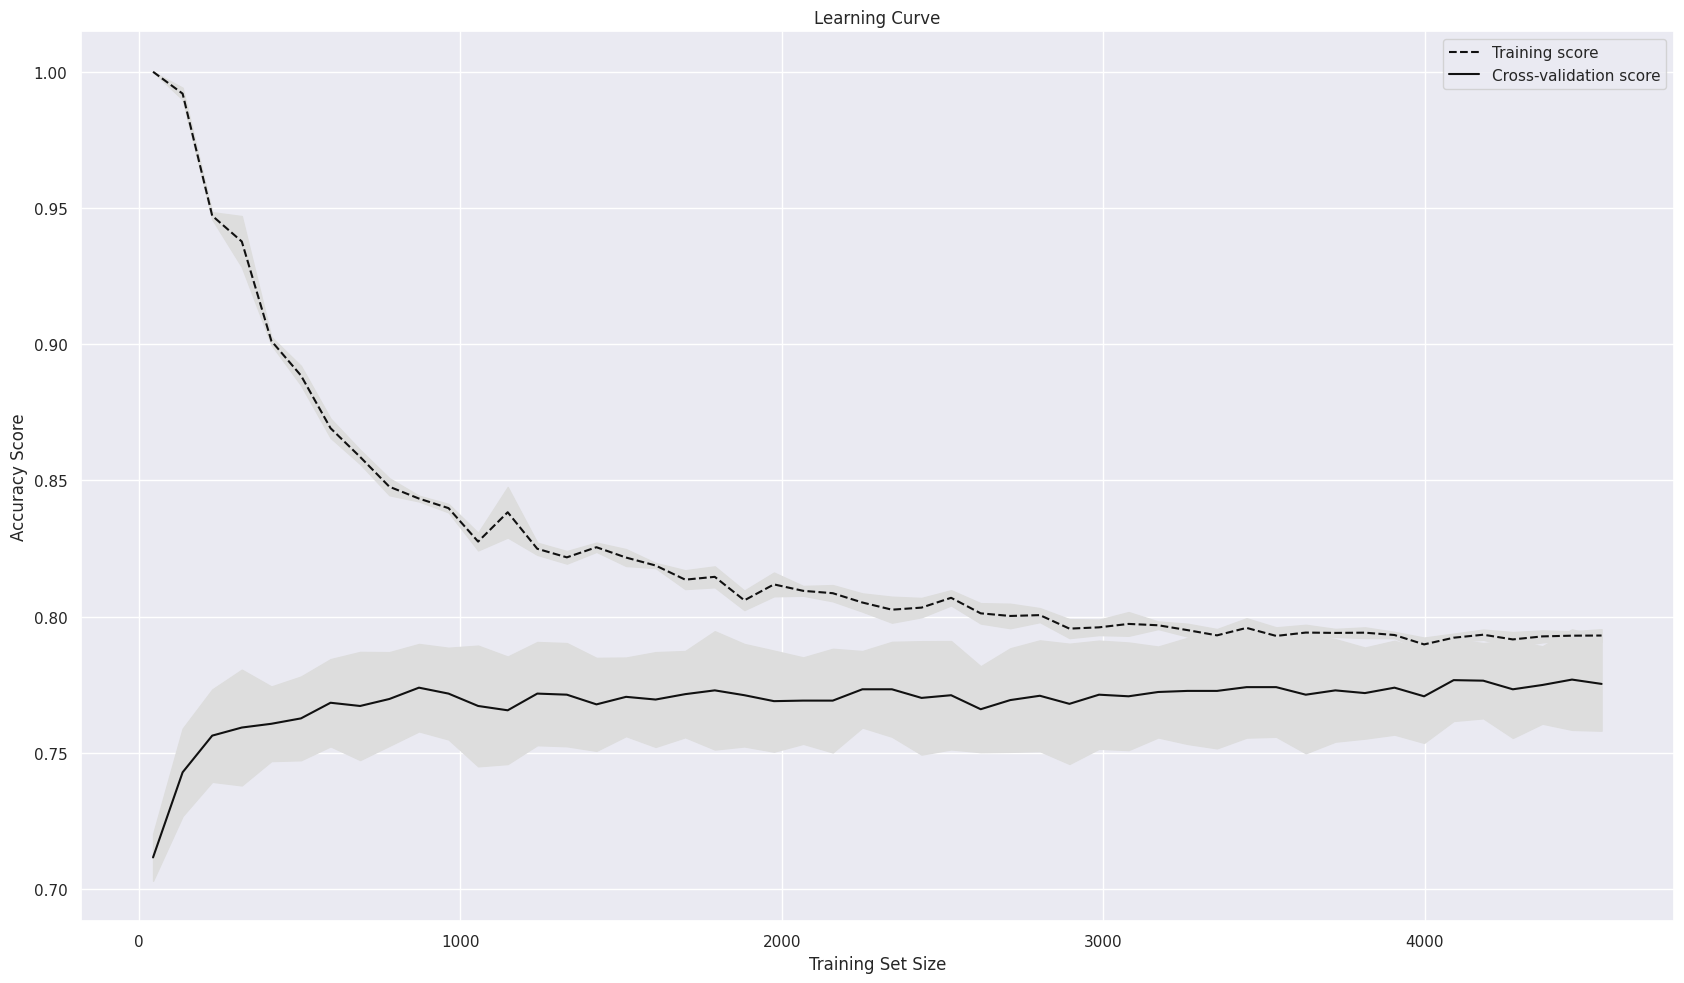

Accuracy score: YEAR 2 BPQ020 0.7873517786561265
Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.60      0.65       418
           2       0.82      0.88      0.85       847

    accuracy                           0.79      1265
   macro avg       0.76      0.74      0.75      1265
weighted avg       0.78      0.79      0.78      1265

Accuracy score: YEAR 3 BPQ020 0.7593887172817428
Classification Report:
               precision    recall  f1-score   support

           1       0.68      0.59      0.63      2137
           2       0.79      0.85      0.82      4014

    accuracy                           0.76      6151
   macro avg       0.74      0.72      0.73      6151
weighted avg       0.75      0.76      0.75      6151



In [ ]:
model_by_years(X_train_year1_bpq, x_test_year1_bpq, Y_train_year1_bpq, y_test_year1_bpq,\
X_train_year2_bpq, x_test_year2_bpq, Y_train_year2_bpq, y_test_year2_bpq,\
x_test_year3_bpq, y_test_year3_bpq,'BPQ020')

### TESTS

In [ ]:
class_rep(X_train_year1_bpq,( Y_train_year1_bpq),x_test_year1_bpq,y_test_year1_bpq)

Accuracy score:  0.781733746130031
Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.60      0.65       435
           2       0.81      0.88      0.84       857

    accuracy                           0.78      1292
   macro avg       0.76      0.74      0.75      1292
weighted avg       0.78      0.78      0.78      1292



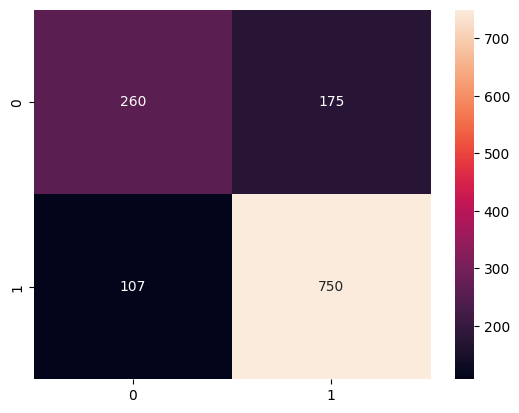

In [ ]:
cmheat(X_train_year1_bpq,( Y_train_year1_bpq),x_test_year1_bpq,y_test_year1_bpq)

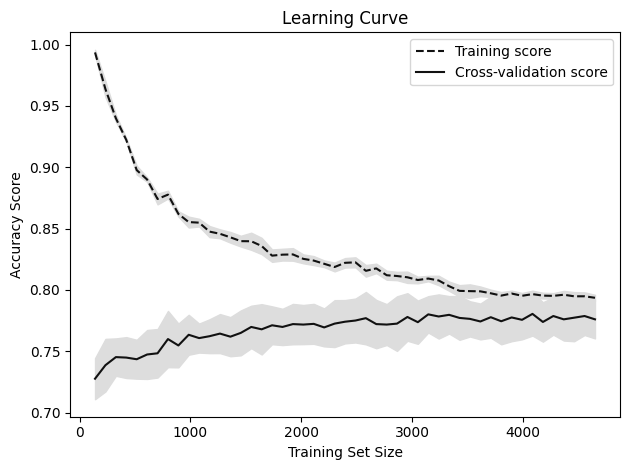

In [ ]:
learning_cur(X_train_year1_bpq, Y_train_year1_bpq)

<Figure size 2000x10000 with 0 Axes>

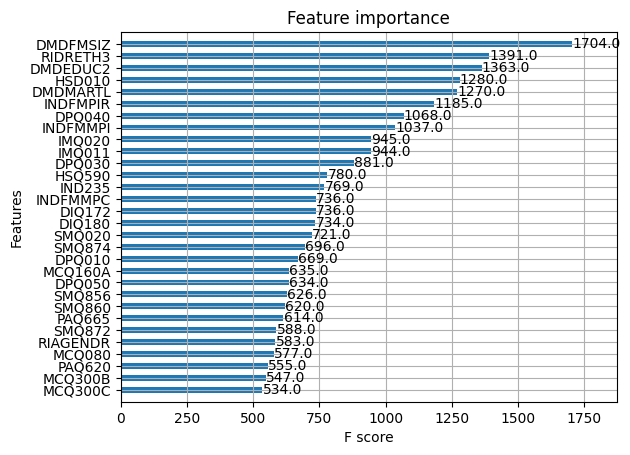

In [ ]:
f_imp(X_train_year1_bpq, Y_train_year1_bpq-1)

<Figure size 2000x10000 with 0 Axes>

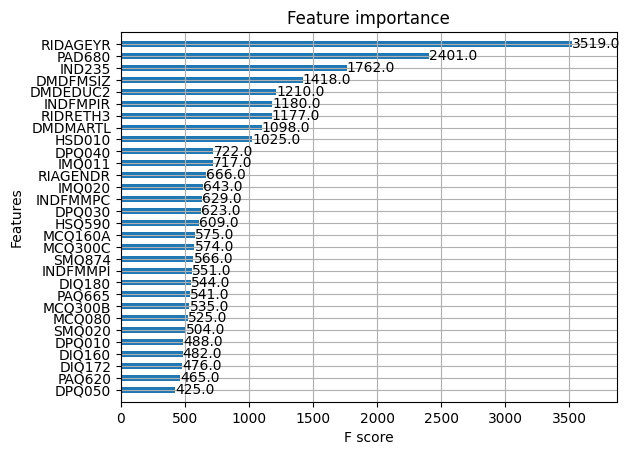

In [ ]:
f_imp(X_train_year2_bpq, Y_train_year2_bpq-1)

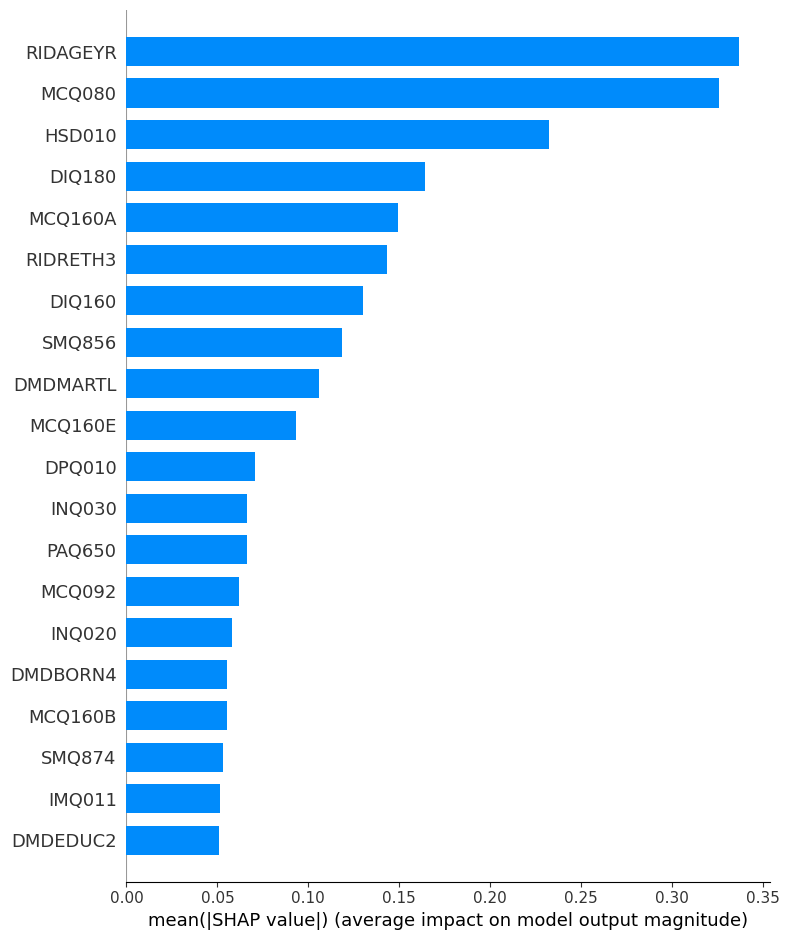

In [ ]:
ft_gbc(X_train_year1_bpq, Y_train_year1_bpq, x_test_year1_bpq)

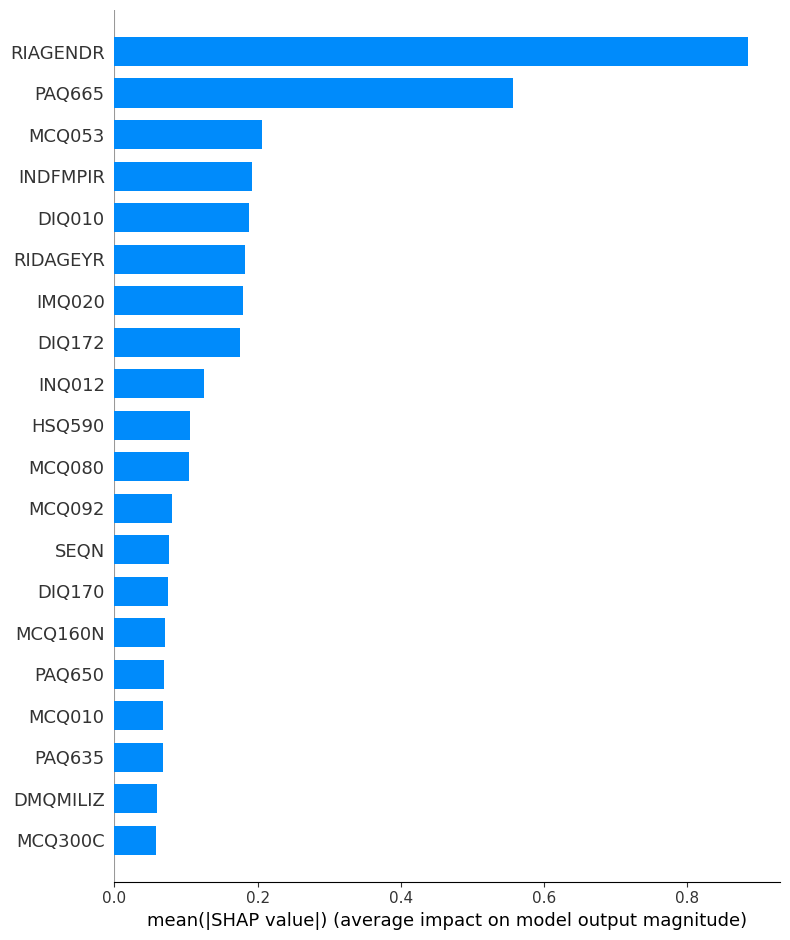

In [ ]:
ft_gbc(X_train_year2_bpq, Y_train_year2_bpq, x_test_year3_bpq)

## **DIQ010**

In [ ]:
X_train_year1_diq, x_test_year1_diq, Y_train_year1_diq, y_test_year1_diq,\
X_train_year2_diq, x_test_year2_diq, Y_train_year2_diq, y_test_year2_diq,\
x_test_year3_diq, y_test_year3_diq = get_years('DIQ010')

DIQ010
year 1:
(9763, 83)
year 2:
(9571, 83)
year 3:
(8893, 83)


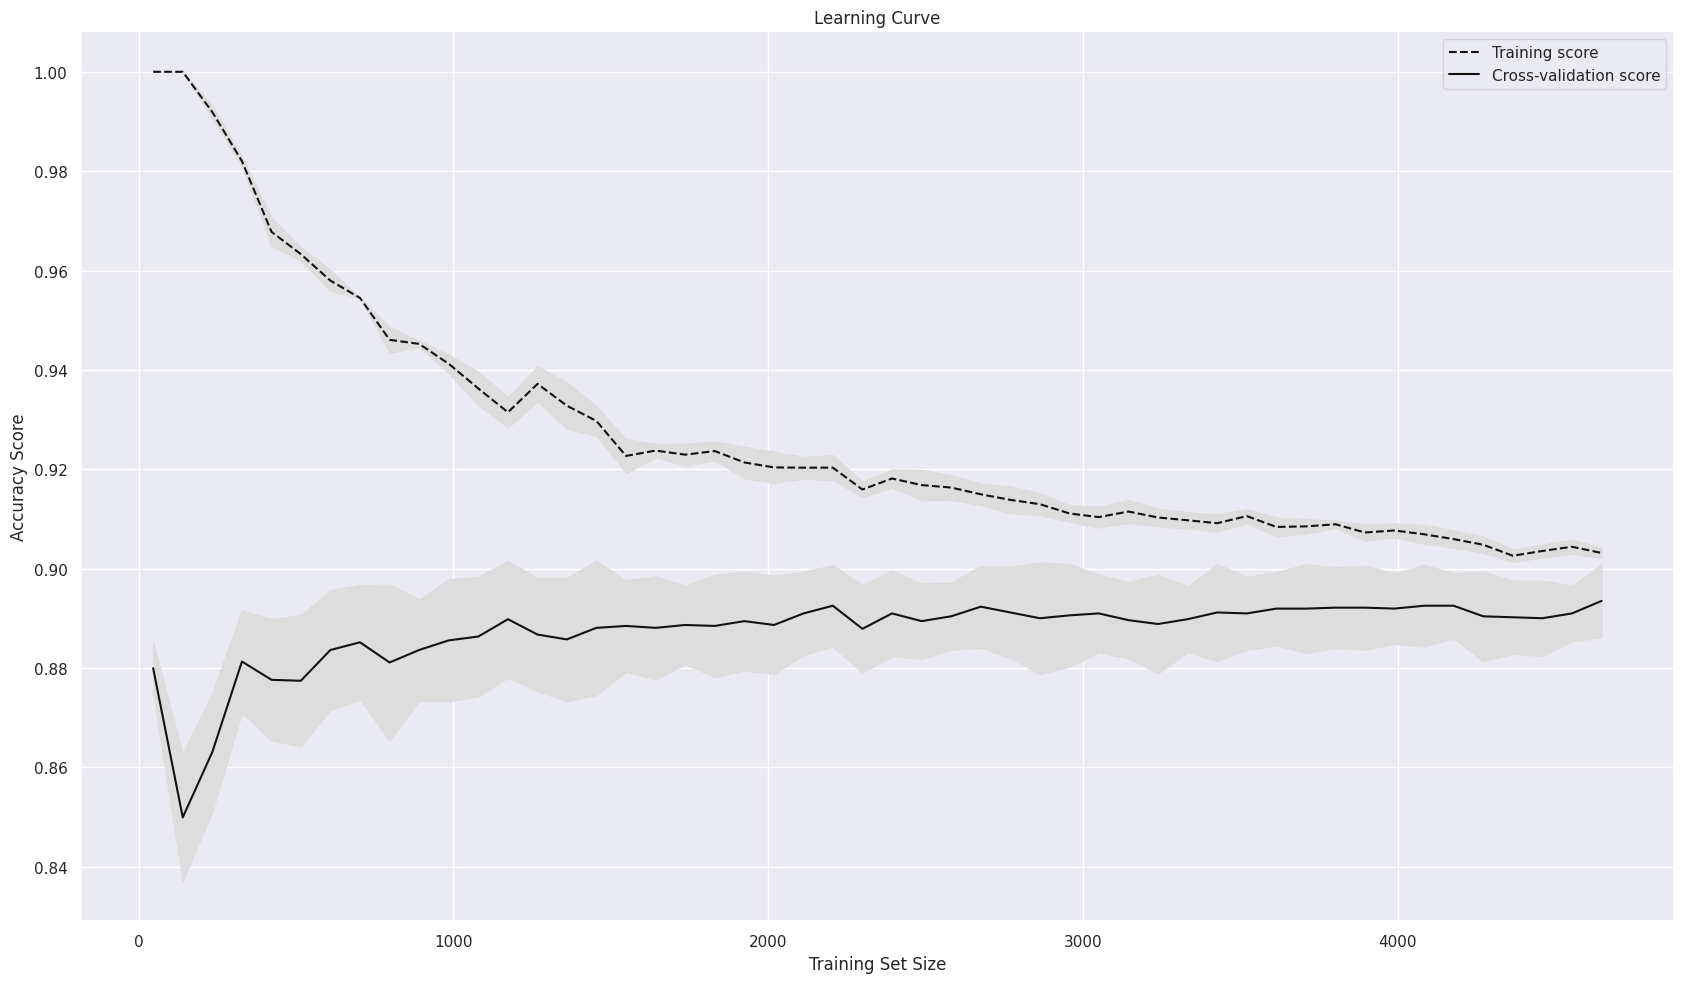

Accuracy score YEAR 1 DIQ010:  0.891640866873065
Classification Report:
               precision    recall  f1-score   support

           1       0.57      0.14      0.22       145
           2       0.90      0.99      0.94      1147

    accuracy                           0.89      1292
   macro avg       0.74      0.56      0.58      1292
weighted avg       0.86      0.89      0.86      1292



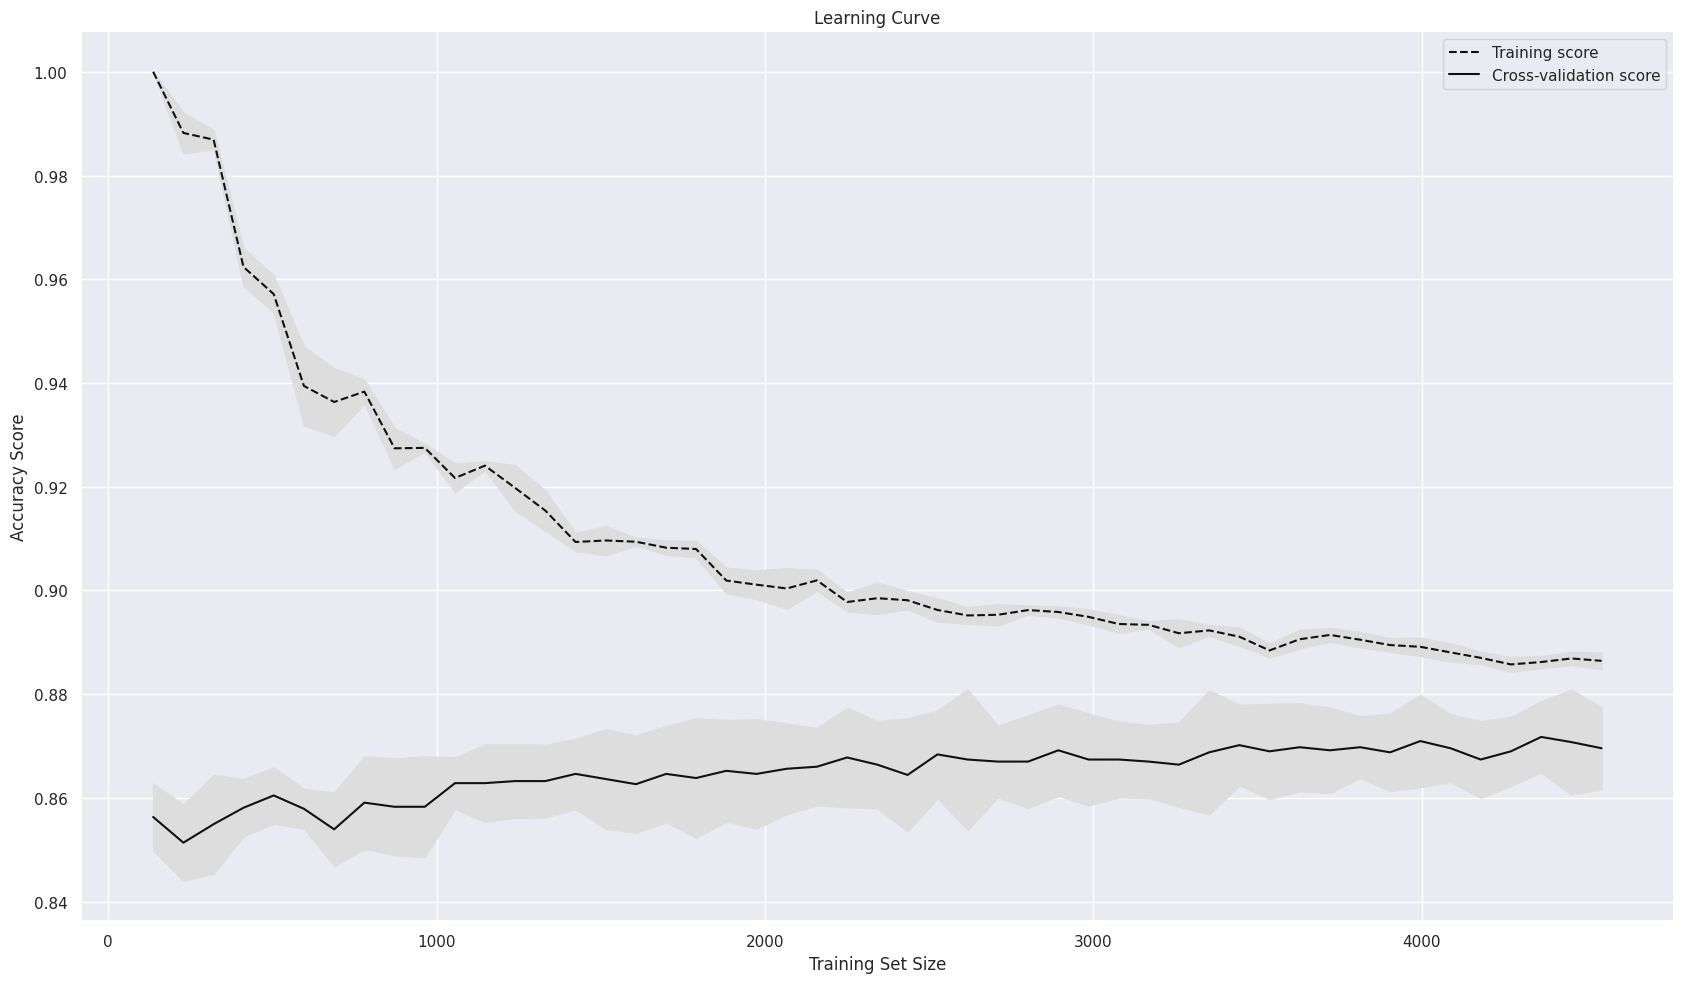

Accuracy score: YEAR 2 DIQ010 0.8813291139240507
Classification Report:
               precision    recall  f1-score   support

           1       0.64      0.25      0.36       169
           2       0.89      0.98      0.93      1095

    accuracy                           0.88      1264
   macro avg       0.77      0.62      0.65      1264
weighted avg       0.86      0.88      0.86      1264

Accuracy score: YEAR 3 DIQ010 0.8639986985521393
Classification Report:
               precision    recall  f1-score   support

           1       0.56      0.22      0.32       878
           2       0.88      0.97      0.92      5269

    accuracy                           0.86      6147
   macro avg       0.72      0.60      0.62      6147
weighted avg       0.84      0.86      0.84      6147



In [ ]:
model_by_years(X_train_year1_diq, x_test_year1_diq, Y_train_year1_diq, y_test_year1_diq,\
X_train_year2_diq, x_test_year2_diq, Y_train_year2_diq, y_test_year2_diq,\
x_test_year3_diq, y_test_year3_diq,'DIQ010' )

### TESTS

In [ ]:
y_test_year3_diq.unique()
y_test_year3_diq = y_test_year3_diq.fillna('-999')

In [ ]:
y_test_year3_diq.unique()

array([2.0, '-999', 1.0], dtype=object)

In [ ]:
class_rep(X_train_year1_diq, Y_train_year1_diq,x_test_year1_diq,y_test_year1_diq)

Accuracy score:  0.9288274449564772
Classification Report:
               precision    recall  f1-score   support

           1       0.57      0.22      0.32       147
           2       0.94      0.99      0.96      1806

    accuracy                           0.93      1953
   macro avg       0.76      0.60      0.64      1953
weighted avg       0.91      0.93      0.91      1953



<Figure size 2000x10000 with 0 Axes>

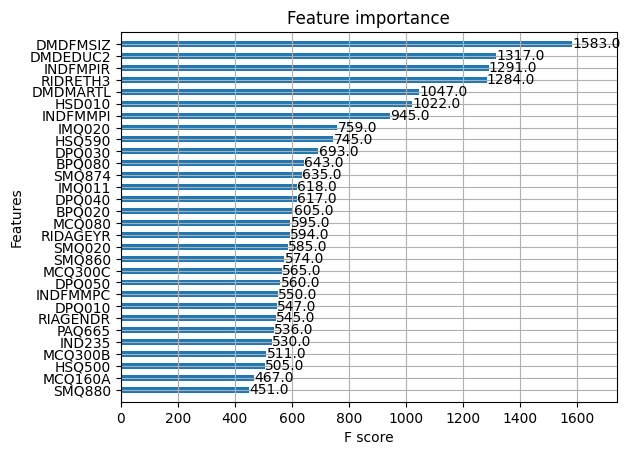

In [ ]:
f_imp(X_train_year1_diq, Y_train_year1_diq-1)

<Figure size 2000x10000 with 0 Axes>

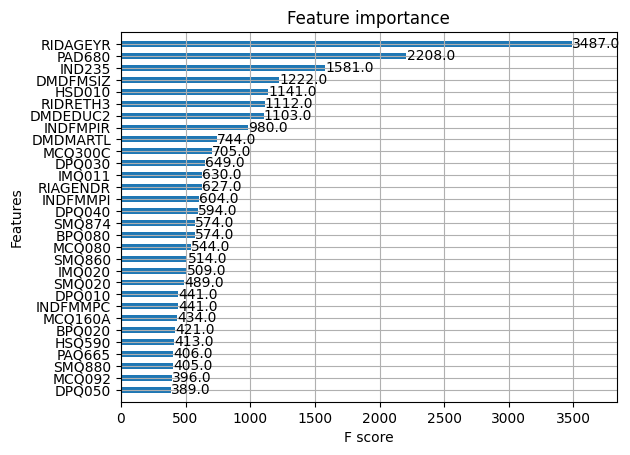

In [ ]:
f_imp(X_train_year2_diq, Y_train_year2_diq-1)

## <b>DPQ020</b>

In [ ]:
X_train_year1_dpq, x_test_year1_dpq, Y_train_year1_dpq, y_test_year1_dpq,\
X_train_year2_dpq, x_test_year2_dpq, Y_train_year2_dpq, y_test_year2_dpq,\
x_test_year3_dpq, y_test_year3_dpq =get_years('DPQ020')

DPQ020
year 1:
(5390, 83)
year 2:
(5161, 83)
year 3:
(5087, 83)


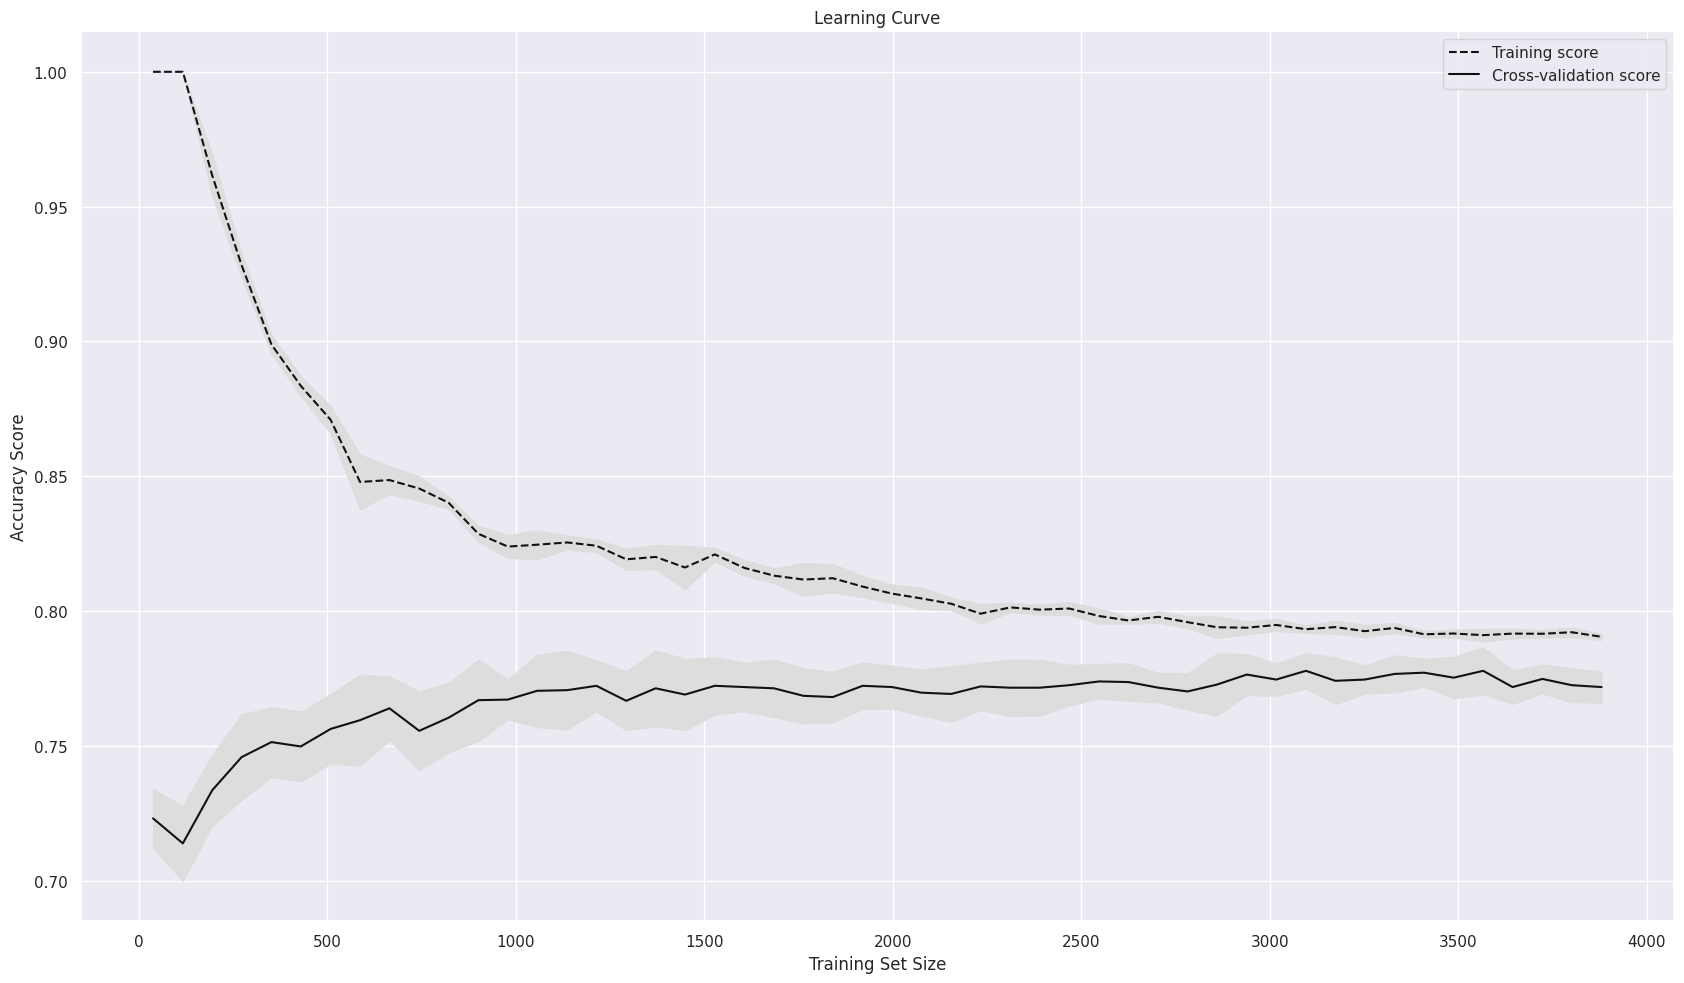

Accuracy score YEAR 1 DPQ020:  0.7578849721706865
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.95      0.86       814
           1       0.52      0.16      0.25       264

    accuracy                           0.76      1078
   macro avg       0.65      0.56      0.55      1078
weighted avg       0.71      0.76      0.71      1078



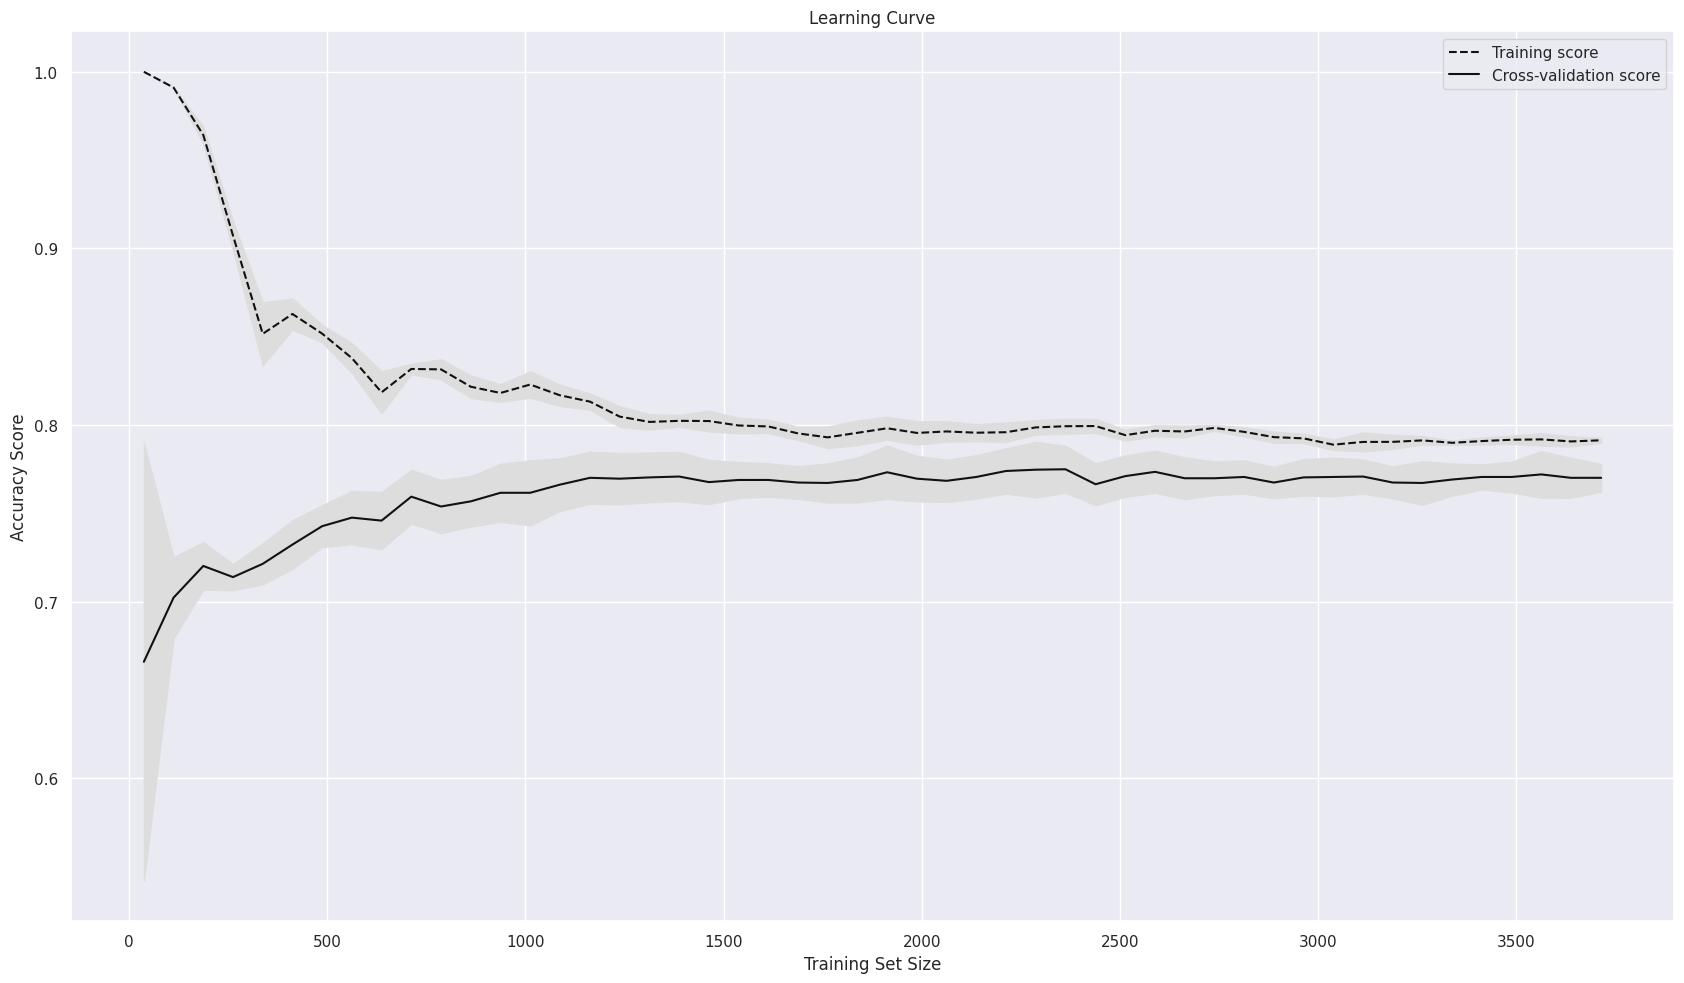

Accuracy score: YEAR 2 DPQ020 0.7812197483059051
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87       785
           1       0.64      0.20      0.30       248

    accuracy                           0.78      1033
   macro avg       0.72      0.58      0.59      1033
weighted avg       0.76      0.78      0.73      1033

Accuracy score: YEAR 3 DPQ020 0.7700019657951641
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.86      3865
           1       0.57      0.17      0.27      1222

    accuracy                           0.77      5087
   macro avg       0.68      0.57      0.56      5087
weighted avg       0.73      0.77      0.72      5087



In [ ]:
model_by_years(X_train_year1_dpq, x_test_year1_dpq, Y_train_year1_dpq, y_test_year1_dpq,\
X_train_year2_dpq, x_test_year2_dpq, Y_train_year2_dpq, y_test_year2_dpq,\
x_test_year3_dpq, y_test_year3_dpq,'DPQ020')

### TESTS

In [ ]:
class_rep(X_train_year1_dpq, Y_train_year1_dpq, x_test_year1_dpq,y_test_year1_dpq)

Accuracy score:  0.75139146567718
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.86       814
           1       0.33      0.08      0.13       181
           2       0.00      0.00      0.00        43
           3       0.20      0.05      0.08        40

    accuracy                           0.75      1078
   macro avg       0.33      0.28      0.27      1078
weighted avg       0.65      0.75      0.68      1078



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


<Figure size 2000x10000 with 0 Axes>

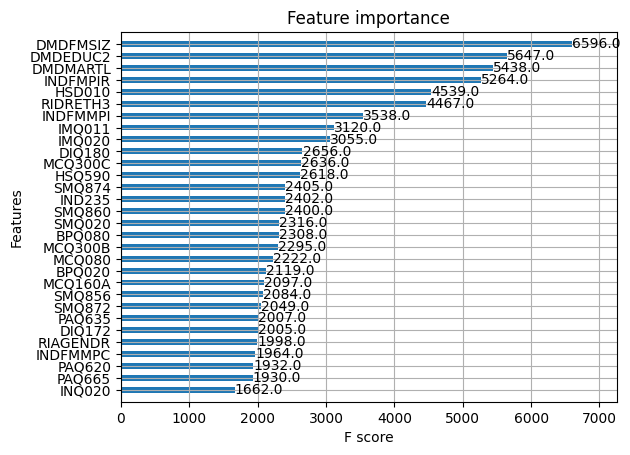

In [ ]:
f_imp(X_train_year1_dpq, (Y_train_year1_dpq))

<Figure size 2000x10000 with 0 Axes>

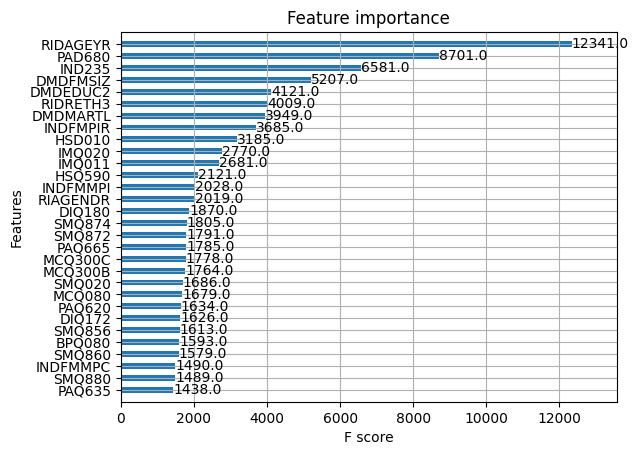

In [ ]:
f_imp(X_train_year2_dpq, (Y_train_year2_dpq))

## **SMQ020**

In [ ]:
X_train_year1_smq, x_test_year1_smq, Y_train_year1_smq, y_test_year1_smq,\
X_train_year2_smq, x_test_year2_smq, Y_train_year2_smq, y_test_year2_smq,\
x_test_year3_smq, y_test_year3_smq =get_years('SMQ020')

SMQ020
year 1:
(6111, 83)
year 2:
(5981, 83)
year 3:
(5856, 83)


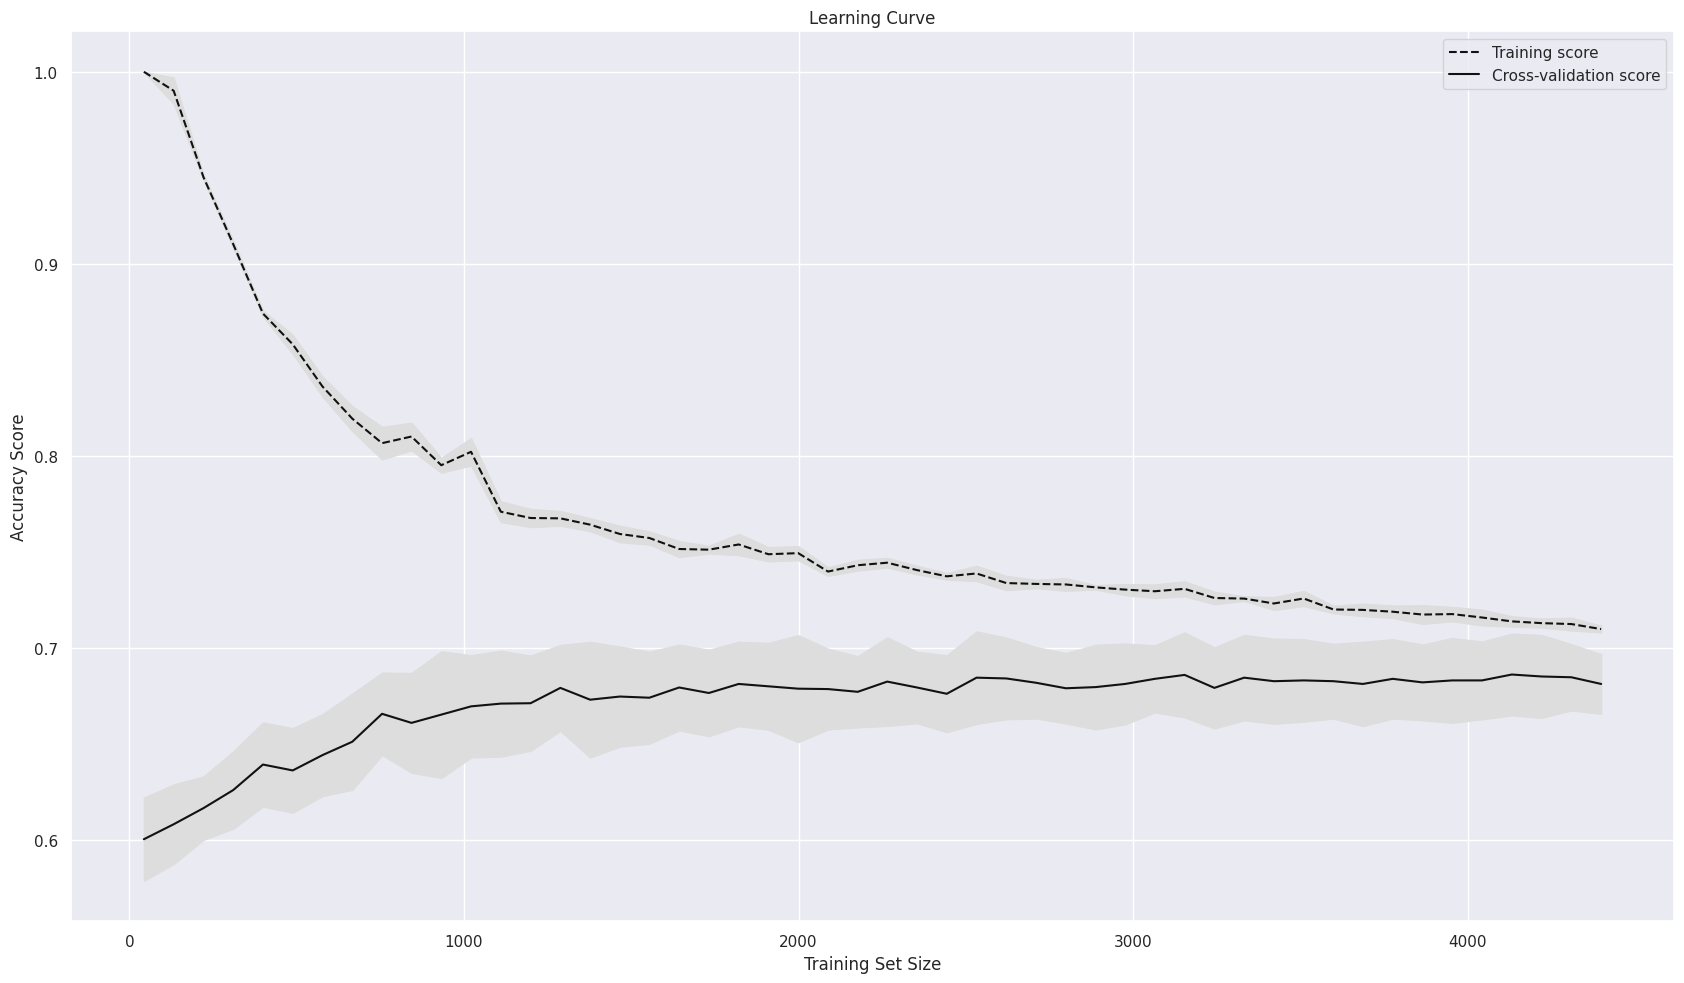

Accuracy score YEAR 1 SMQ020:  0.6590351594439902
Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.50      0.55       516
           2       0.68      0.78      0.72       707

    accuracy                           0.66      1223
   macro avg       0.65      0.64      0.64      1223
weighted avg       0.65      0.66      0.65      1223



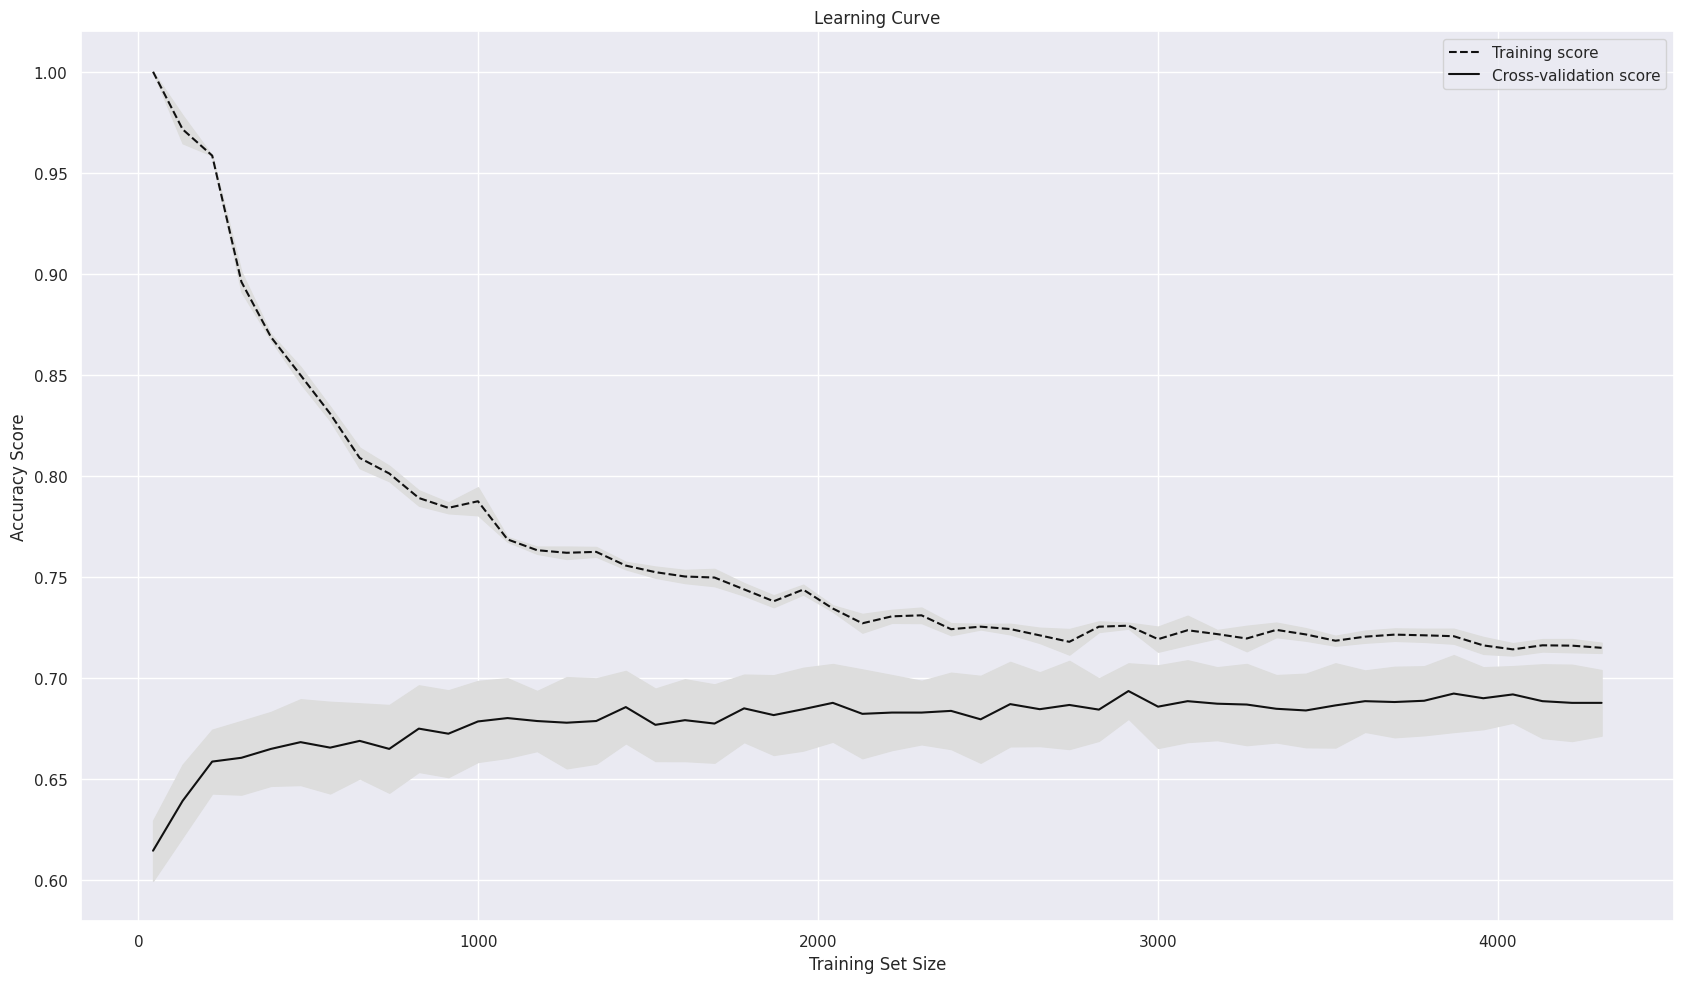

Accuracy score: YEAR 2 SMQ020 0.7184628237259816
Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.51      0.60       485
           2       0.72      0.86      0.78       712

    accuracy                           0.72      1197
   macro avg       0.72      0.69      0.69      1197
weighted avg       0.72      0.72      0.71      1197

Accuracy score: YEAR 3 SMQ020 0.704405737704918
Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.57      0.61      2359
           2       0.73      0.79      0.76      3497

    accuracy                           0.70      5856
   macro avg       0.69      0.68      0.69      5856
weighted avg       0.70      0.70      0.70      5856



In [ ]:
model_by_years(X_train_year1_smq, x_test_year1_smq, Y_train_year1_smq, y_test_year1_smq,\
X_train_year2_smq, x_test_year2_smq, Y_train_year2_smq, y_test_year2_smq,\
x_test_year3_smq, y_test_year3_smq, 'SMQ020')

<Figure size 2000x10000 with 0 Axes>

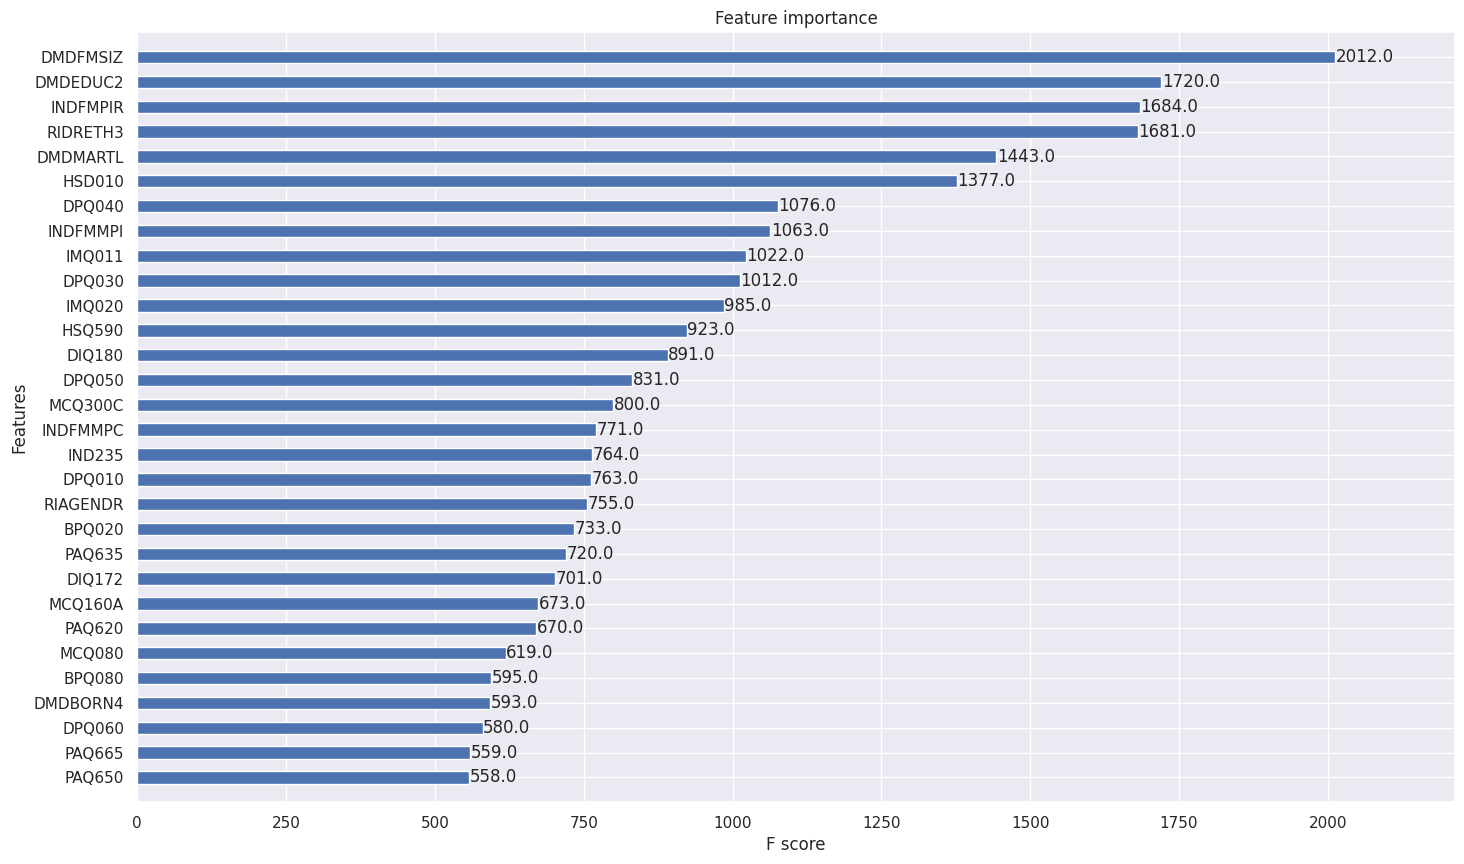

In [ ]:
f_imp(X_train_year1_smq, (Y_train_year1_smq-1))